In [5]:
# This notebook plots the s value distribution of different motifs
# and the lower, median, and upper bound estimates of the distribution of s for different motifs/optimal alleles

In [6]:
%pylab inline
import sys
import seaborn as sns
import pandas as pd
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import glob
import numpy as np
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/supp_validation/'

Populating the interactive namespace from numpy and matplotlib


/storage/BonnieH/anaconda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
def main():
    to_plot = 'median'
    print('Running main')
    total = 0
    
    folder = 'plot'#'t42'
    fig_num = 0
    pers = [2,3,4] 
    #color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray','yellow','gold']
    
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT']#,'ACT','0.0','1.0']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    
    opt_dic = {}
    opt_dic[2] = range(11,21,1)
    opt_dic[3] = range(5,14,1)
    opt_dic[4] = range(7,11,1)
   
    color_dic_motif={}
   
    for per in pers:
        i = -1
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]
            
    print(color_dic_motif)
    
    color_dic_opt={}
    
    for per in pers:
        i = -1
        for opt in opt_dic[per]:
            i = i + 1
            color_dic_opt[(per, opt)] = color_list[i]
             
    dic_means = {}
    dic_legend = {}
    dic_diff_min = {}
    dic_diff_max = {}
    dic_num_loci = {}

    for per in pers:
        dic_means[per] = {}
        dic_legend[per] = {}
        dic_diff_min[per] = {}
        dic_diff_max[per] = {}
        dic_num_loci[per] = {}
        for motif in motif_dic[per]:
            dic_means[per][motif] = [-1] * len(opt_dic[per])
            dic_legend[per][motif] = opt_dic[per]
            dic_diff_min[per][motif] = [0] * len(opt_dic[per])
            dic_diff_max[per][motif] = [0] * len(opt_dic[per])
            dic_num_loci[per][motif] = [0] * len(opt_dic[per])
   
    spacing = 8
    
    for per in pers:
        minimum = 100
        maximum = -100
        opt_alleles = opt_dic[per]
        print('Running period: %d'%(per))
        
        list_of_mean = []
        errors = []
        legend_labels = []
        for opt in opt_alleles:
            specific_color_list = []
            dic = {}
            dic['Period, Optimal allele, Motif'] = []
            dic['s values'] = []
            dic['Fraction of loci'] = []
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            #file_list = glob.glob('./results/results/%s/per_%d_*opt_%s.txt'%(folder, per, opt_string) )
            file_list = glob.glob('/gymreklab-tscc/bonnieh/heatmap/results/%s/per_%d_*opt_%s.txt'%(folder, per, opt_string))
            file_list.sort() 
            
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[9]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')
                num_loci = info[1]
                num_loci = num_loci.strip().split(' ')
                num_loci = int(num_loci[0])
                
                if num_acc > 0 and num_loci >= 0:
                    line = lines[12]
                    info = line.strip().split(': ')
                    mean_value = float(info[1])
                    line = lines[13]
                    info = line.strip().split(': ')
                    upper_mean_value = float(info[1])
                    line = lines[14]
                    info = line.strip().split(': ')
                    lower_mean_value = float(info[1])
                    line = lines[2]
                    info = line.strip().split(': ')
                    motif = info[2]
                    motif = motif.strip().split(' ')
                    motif = motif[0]
                    opt_allele = int(info[3])
                    line = lines[11]
                    info = line.strip().split(',')
                    k = float(info[0])
                    theta = float(info[1])
                     
                    line = lines[15]       
                    info = line.strip().split(': ')
                    params = info[1]
                    params = params.strip().split('), ')
                    params_list = []
                    for param in params:
                        param = param[1:]
                        if param[-1] == ')':
                            param = param[:-1]
                        param = param.strip().split(', ')
                        params_list.append(((float(param[0])), float(param[1])))
                    sorted_params = sorted(params_list, key=lambda x: x[0]*x[1])
                    num_accepted = len(sorted_params)
                    print(motif+ ' number a,b pairs accepted: ' +str(num_accepted))
                    list_acc = list(range(0,num_accepted))

                    middle_index = int(num_accepted/2)
                        
                    lower_index = int(np.percentile(list_acc, 2.5))
                        
                    upper_index = int(np.percentile(list_acc, 97.5))
                        
                    indices = [lower_index, middle_index, upper_index]
                    
                    ### Plot the lower, median, and upper bound estimates of the distribution of s for different motifs/optimal alleles ###
                    for index in indices:
                        svals = GetGammaBins(sorted_params[index][0], sorted_params[index][1], 1000)
                        
                        # Plot discrete pdf of gamma distribution
                        fig_num = fig_num + 1
                        plt.figure(fig_num)
                        x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
                        y_pos = np.arange(len(x))
                        barWidth = 0.2
                        r1 = np.arange(len(x))
                        
                        plt.bar(r1, svals, color=color_dic_motif[motif], width=barWidth) 
                        plt.xticks([r + barWidth/2 for r in range(len(x))], x)
                        plt.xticks(rotation=15) 
                        plt.xlabel("S value")
                        plt.ylabel("Probability")
                        
                        plt.title("Per %d Opt %d %s\nGamma Distribution k=%.5f; theta=%.5f\nMean %.2E"%(per, opt, motif, sorted_params[index][0], sorted_params[index][1], sorted_params[index][0]*sorted_params[index][1])) 
                        plt.show()
                    ### END ###
                    
                    
                    # Plot mean of means
                    means_list = []
                    for params_combo in params_list:
                        s, median, mean = GetGammaBins(params_combo[0], params_combo[1], 100, True)
                        if to_plot == 'mean':
                            means_list.append(mean)
                        elif to_plot == 'median':
                            means_list.append(median)
                    total = total + num_accepted
                    mean_of_means = np.mean(means_list)
                    std_err = stats.sem(means_list, ddof = 0)
                    if to_plot == 'mean' or to_plot == 'median':
                        dic_means[per][motif][opt-opt_alleles[0]]= mean_of_means
                        dic_diff_min[per][motif][opt-opt_alleles[0]]= std_err
                        dic_diff_max[per][motif][opt-opt_alleles[0]]= std_err
                        dic_num_loci[per][motif][opt-opt_alleles[0]]= num_loci
                        print((mean_of_means,mean_of_means-std_err,mean_of_means+std_err))
                        max_val = max(mean_of_means,mean_of_means-std_err,mean_of_means+std_err)
                        min_val = min(mean_of_means,mean_of_means-std_err,mean_of_means+std_err)
                    else:
                        dic_means[per][motif][opt-opt_alleles[0]]= mean_value
                        dic_diff_min[per][motif][opt-opt_alleles[0]]= mean_value-lower_mean_value
                        dic_diff_max[per][motif][opt-opt_alleles[0]]= upper_mean_value-mean_value
                        dic_num_loci[per][motif][opt-opt_alleles[0]]= num_loci
                        print((mean_value, lower_mean_value, upper_mean_value))
                        max_val = max(mean_value,lower_mean_value,upper_mean_value)
                        min_val = min(mean_value,lower_mean_value,upper_mean_value)
                    if min_val < minimum:
                        minimum = min_val
                    if max_val > maximum:
                        maximum = max_val
                            
                    params_list = params_list[0:100]
                    if per == 3 or per == 4:
                        params_list = params_list[0:20]
                    if motif != '0.0' and motif!='1.0':
                        specific_color_list.append(color_dic_motif[motif])
                        for param in params_list:
                            svals = GetGammaBins(param[0], param[1], 1000)
                            combos = [('0<=s<10^-4',svals[0]),('10^-4<=s<10^-3',svals[1]),('10^-3<=s<10^-2',svals[2]),('s>=10^-2',svals[3])]
                            for combo in combos:
                                dic['Period, Optimal allele, Motif'].append('Per %d Opt %d %s'%(per, opt, motif))
                                dic['s values'].append(combo[0])
                                dic['Fraction of loci'].append(combo[1])
                                
            if len(specific_color_list) > 0:
                df = pd.DataFrame(data=dic)
                fig_num = fig_num + 1
                plt.figure(fig_num) 

                g = sns.swarmplot(x="s values", y="Fraction of loci", hue="Period, Optimal allele, Motif", data=df, palette=specific_color_list) #Color_list
                plt.ylim(-0.1, 1.1)
                g.legend(bbox_to_anchor=(1.01, 1.01))
                plt.xticks(rotation=15)
                plt.show()
                
        ### Plot Mean/Mean of Means/Median of Means ###
        fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]},sharex=True,figsize=(15,10))
        ax1 = axs[0]
        ax2 = axs[1]
        offset = 0
        median_pos = int(len(dic_means[per])/2)
        i = 0
        for motif in dic_means[per]:
            list_of_num_loci = dic_num_loci[per][motif]
            y_pos = list(range(offset,(len(dic_means[per])+spacing)*len(opt_alleles) + offset,len(dic_means[per])+spacing))
            ax1.bar(y_pos, list_of_num_loci,color=color_dic_motif[motif],label=motif)  
            offset = offset + 1
        ax1.set_ylabel("Number of loci",size=15)
        ax1.tick_params(labelsize=15)
        ax1.set_xticks([])
        ax1.set_title('Period %d'%(per),size=15)
        
        offset = 0
        median_pos = int(len(dic_means[per])/2)
        
        for motif in dic_means[per]:
            
            list_of_mean = dic_means[per][motif]
            legend_labels = dic_legend[per][motif]
            diff_min = dic_diff_min[per][motif]
            diff_max = dic_diff_max[per][motif]
            y_pos = list(range(offset,(len(dic_means[per])+spacing)*len(opt_alleles) + offset,len(dic_means[per])+spacing))
            
            ax2.errorbar(y_pos, list_of_mean, marker = 'o', ls = 'none',yerr=[diff_min,diff_max],c=color_dic_motif[motif],label=motif)
            if offset == median_pos:
                y_pos_graph = y_pos
            
            offset = offset + 1
        
        ax2.set_yscale('log')
        ax2.tick_params(labelsize=15)
        ax2.set_xticks(y_pos_graph) 
        ax2.set_xticklabels(legend_labels)
        ax2.set_ylabel("s (mean +/- std error)",size=15)
        ax2.set_xlabel("Optimal allele",size=15)
        ax1.legend(bbox_to_anchor=(1, 1))
        
        ax2.set_ylim(minimum - minimum/2, maximum + minimum/2)
        fig.tight_layout()

Running main
{'AC': 'red', 'AG': 'orange', 'AT': 'lawngreen', 'ACC': 'red', 'AGG': 'orange', 'AGC': 'lawngreen', 'CCG': 'forestgreen', 'AAG': 'turquoise', 'AAC': 'blue', 'ATC': 'purple', 'AAT': 'brown', 'AAGG': 'red', 'AAAT': 'orange', 'ATCC': 'lawngreen', 'AATC': 'forestgreen', 'AAAC': 'turquoise', 'AATG': 'blue', 'ACAT': 'purple', 'AGAT': 'brown', 'AAAG': 'slategray'}
Running period: 2
AC number a,b pairs accepted: 2795


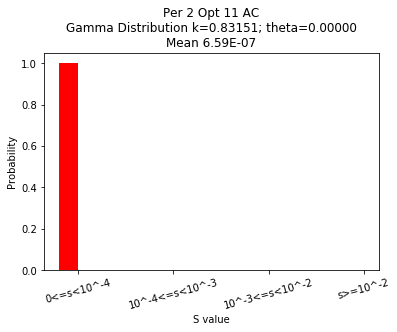

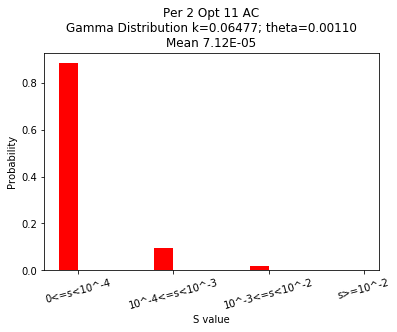

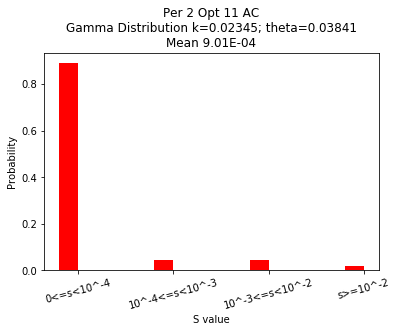

(1.0930407624230968e-05, 1.0623256686797527e-05, 1.1237558561664409e-05)
AG number a,b pairs accepted: 3189


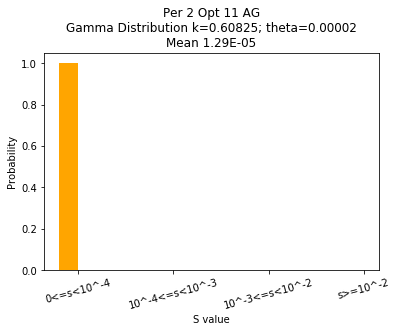

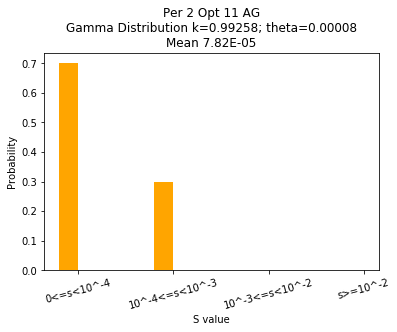

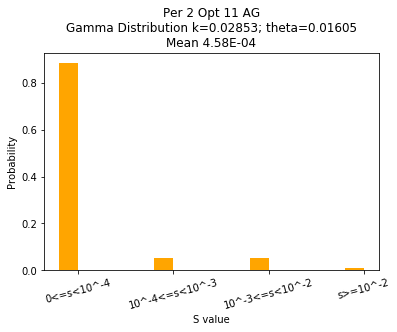

(3.019968504810268e-05, 2.9765260811288596e-05, 3.063410928491677e-05)
AT number a,b pairs accepted: 2749


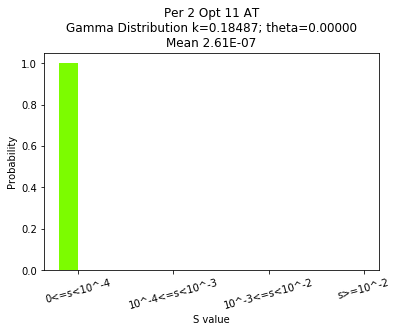

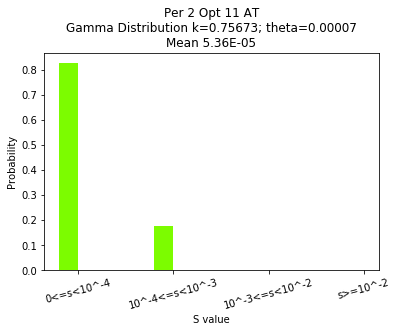

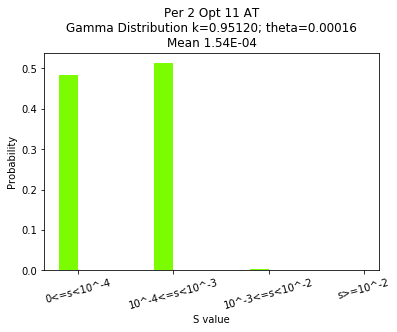

(2.9314814565053227e-05, 2.8761438541267226e-05, 2.9868190588839228e-05)


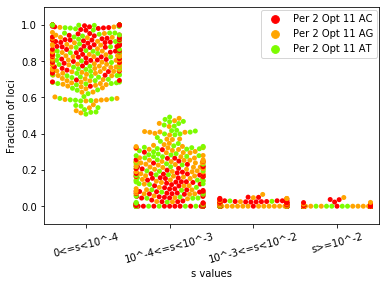

AC number a,b pairs accepted: 12610


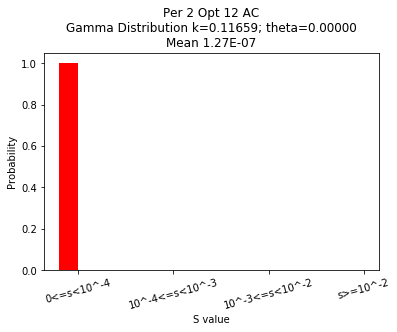

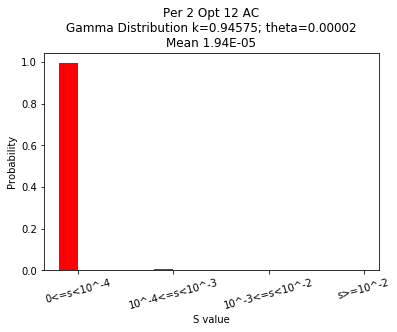

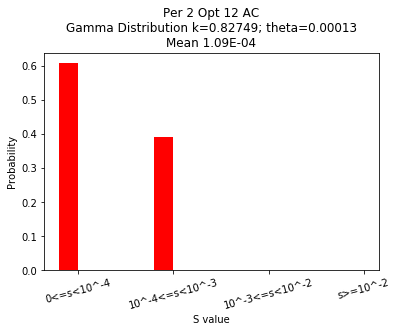

(1.2774664943422774e-05, 1.2620912808191151e-05, 1.2928417078654397e-05)
AG number a,b pairs accepted: 5264


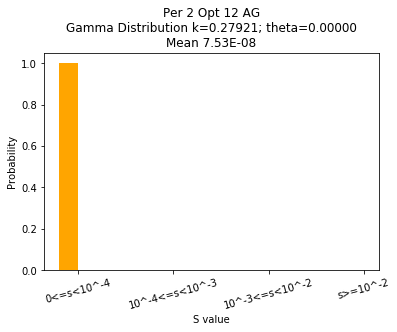

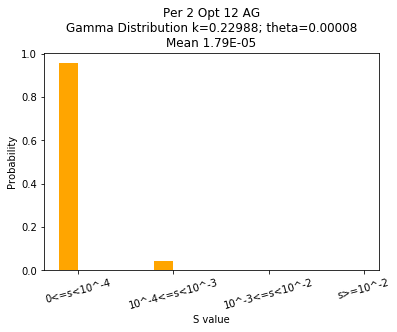

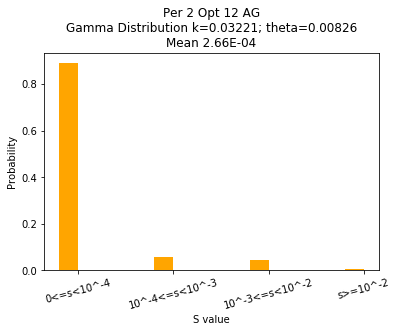

(9.74641270491182e-06, 9.519897435512185e-06, 9.972927974311455e-06)
AT number a,b pairs accepted: 613


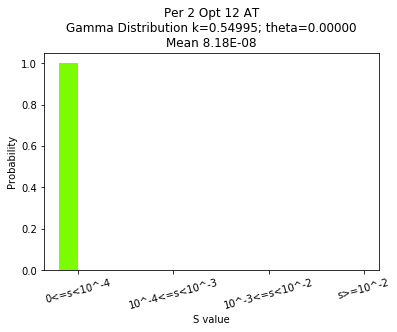

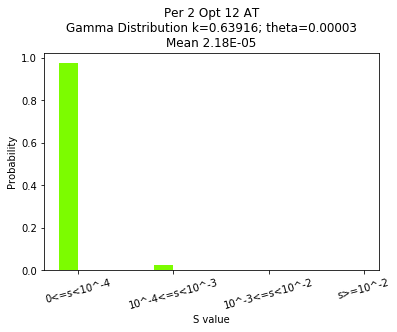

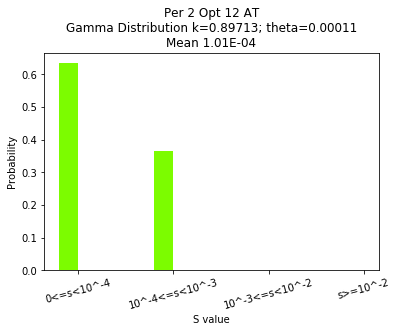

(1.3201796186559236e-05, 1.2564915015933523e-05, 1.3838677357184948e-05)


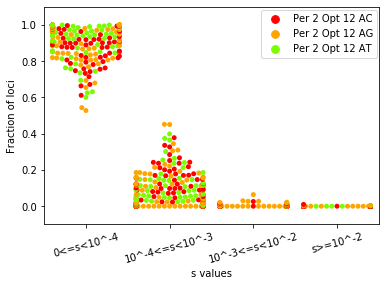

AC number a,b pairs accepted: 396


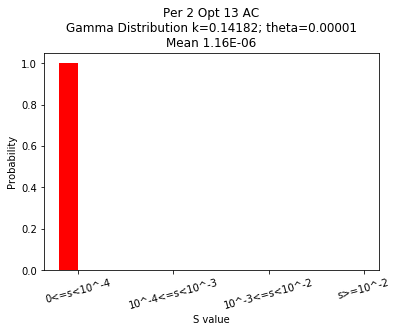

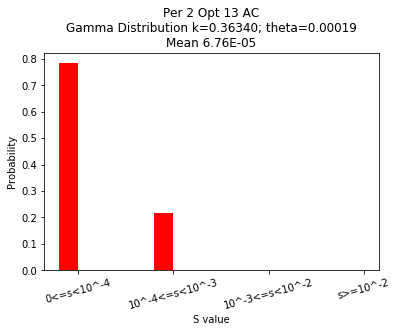

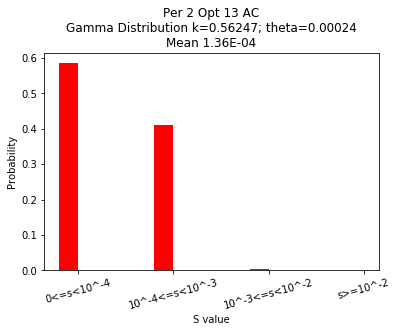

(3.559067790382497e-05, 3.424961851164353e-05, 3.693173729600641e-05)
AG number a,b pairs accepted: 20


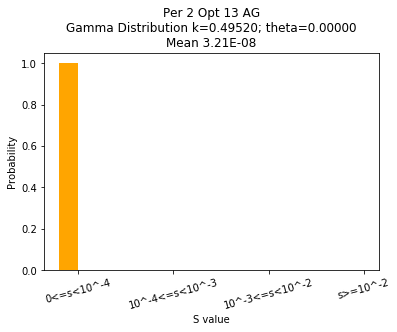

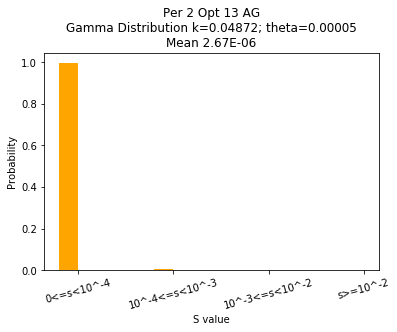

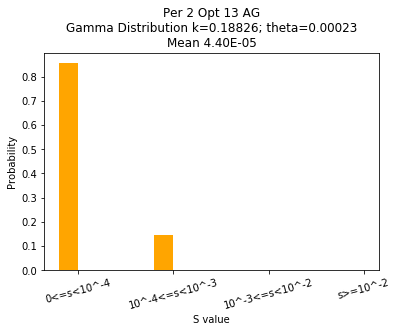

(3.1277935385367936e-06, 1.7120290830408077e-06, 4.543557994032779e-06)
AT number a,b pairs accepted: 2


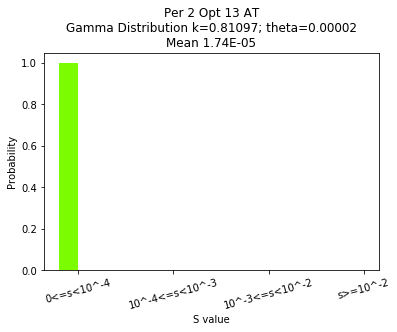

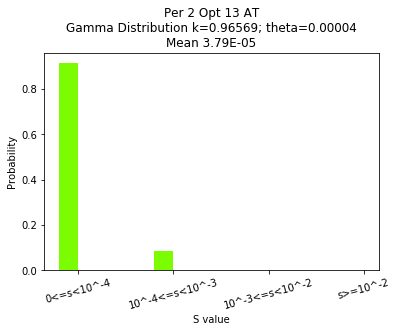

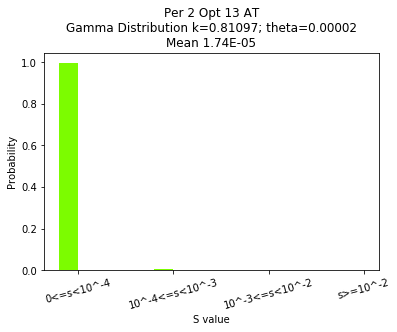

(2.2994122778818705e-05, 1.3852616921213927e-05, 3.2135628636423485e-05)


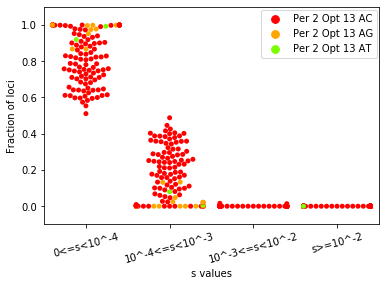

AC number a,b pairs accepted: 864


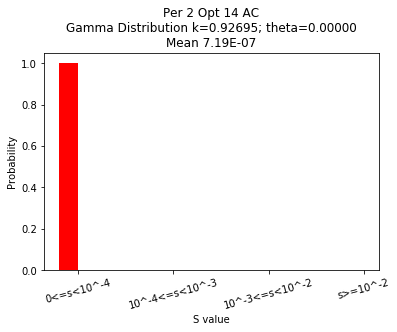

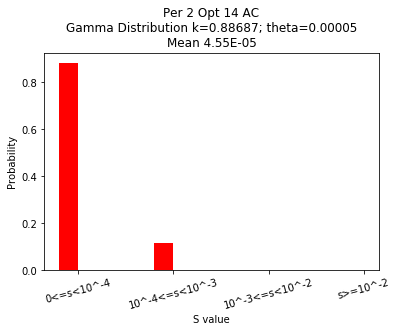

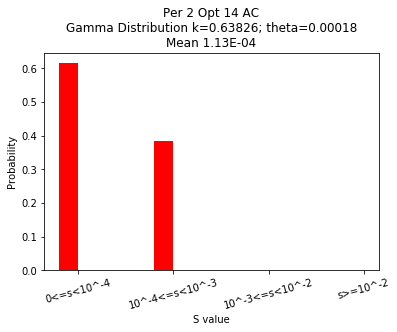

(2.6708879818858955e-05, 2.6022536472647765e-05, 2.7395223165070144e-05)
AG number a,b pairs accepted: 192


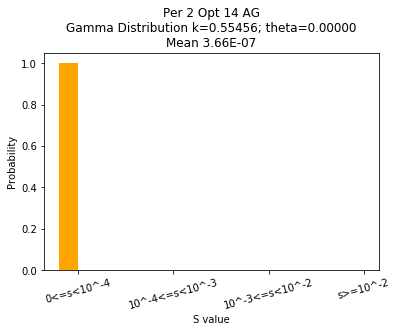

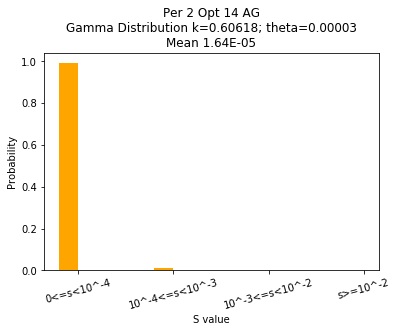

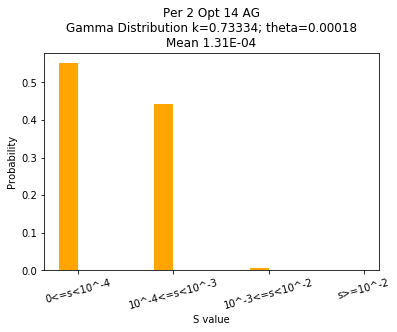

(1.1837309747506588e-05, 1.066704467527954e-05, 1.3007574819733637e-05)


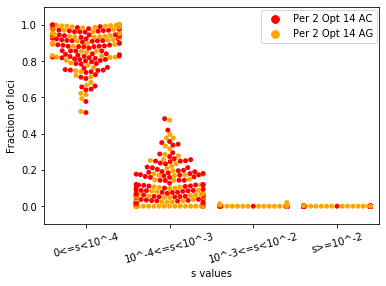

AC number a,b pairs accepted: 3883


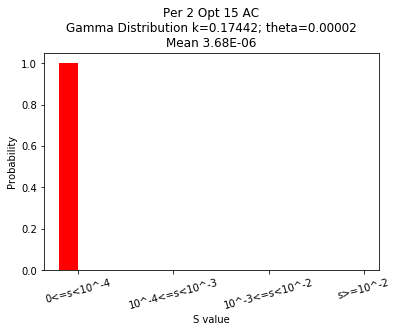

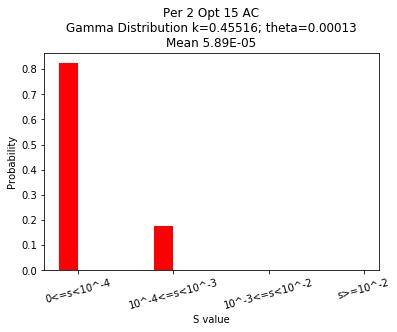

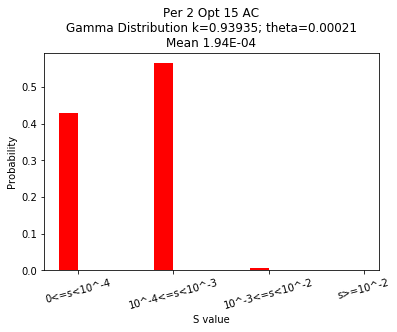

(3.58667675574969e-05, 3.530008205165749e-05, 3.6433453063336313e-05)
AG number a,b pairs accepted: 8


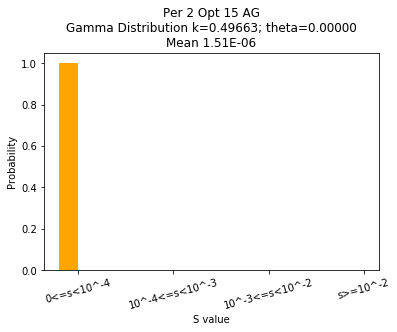

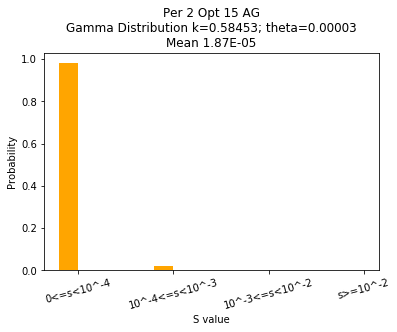

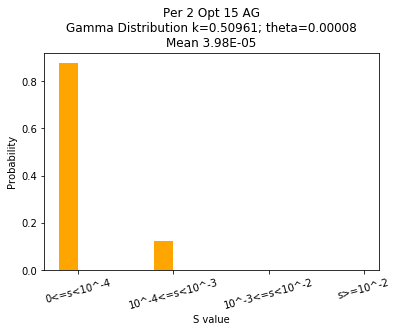

(1.0175702978509212e-05, 5.951330720253457e-06, 1.4400075236764966e-05)
AT number a,b pairs accepted: 31


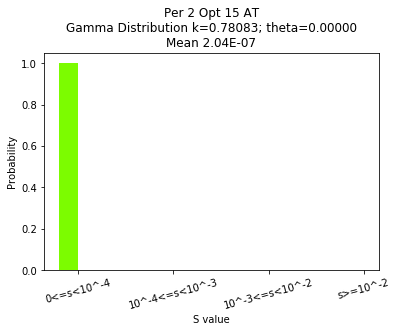

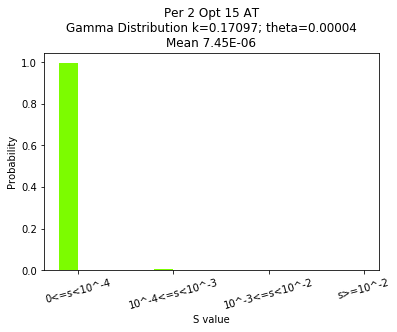

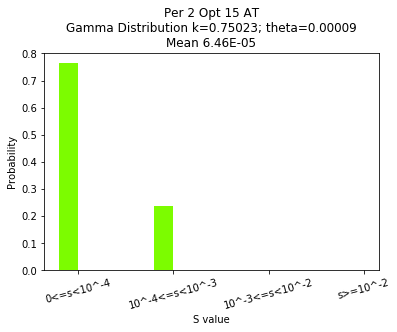

(7.189811042707679e-06, 4.730388094783833e-06, 9.649233990631526e-06)


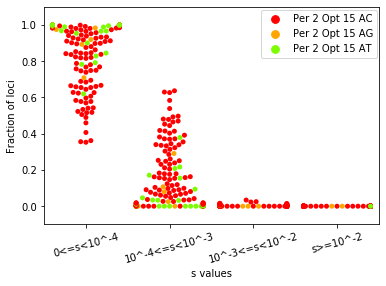

AC number a,b pairs accepted: 12477


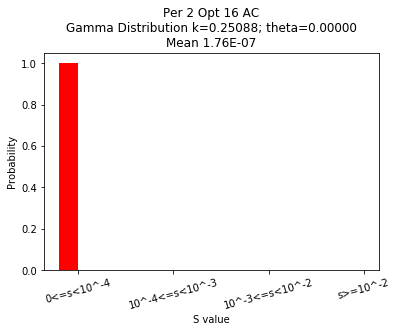

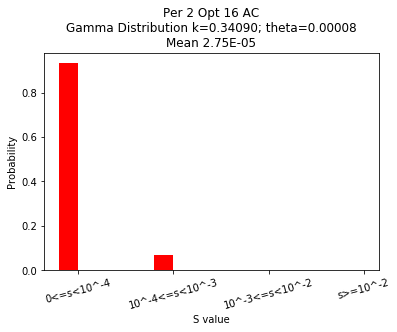

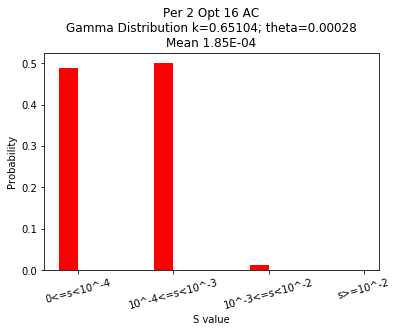

(1.9116780068973678e-05, 1.888489125937984e-05, 1.9348668878567515e-05)
AG number a,b pairs accepted: 76


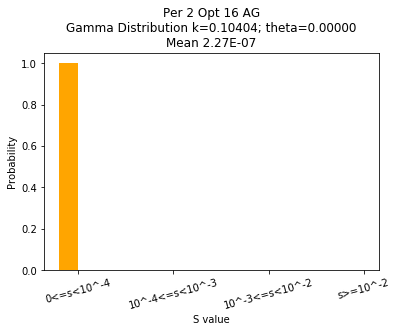

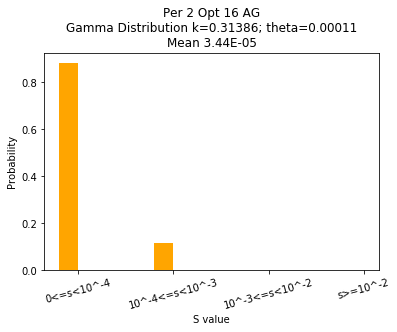

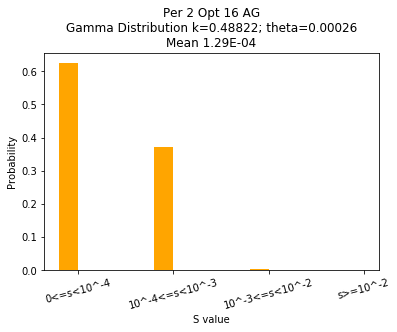

(2.368639358196758e-05, 2.1195924164295156e-05, 2.6176862999640006e-05)
AT number a,b pairs accepted: 2165


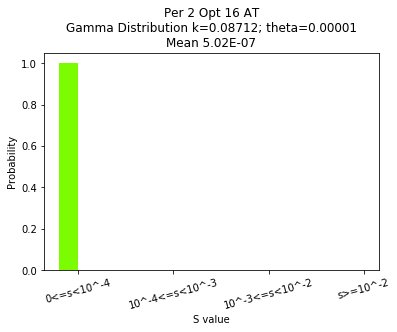

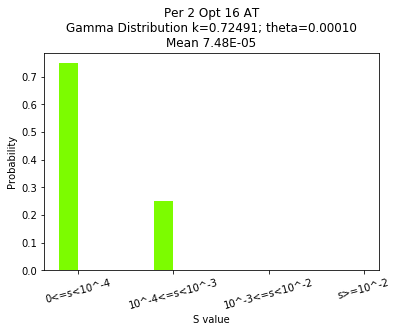

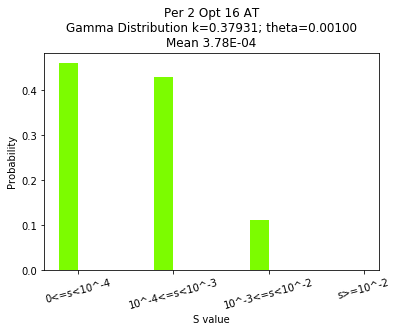

(5.008780161951493e-05, 4.886591865872732e-05, 5.130968458030254e-05)


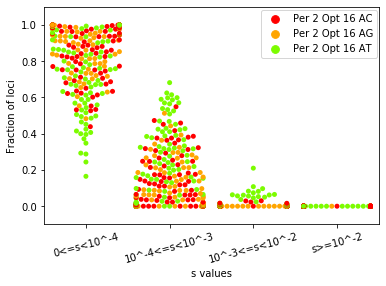

AC number a,b pairs accepted: 11308


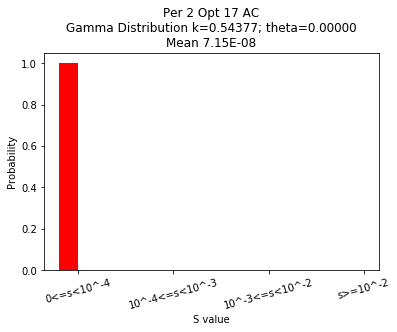

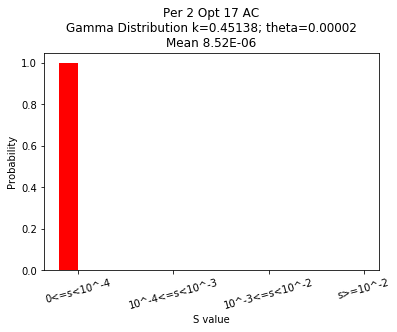

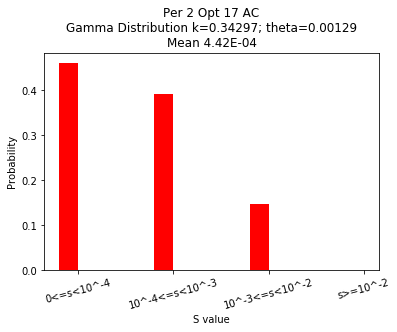

(1.9342298863757224e-05, 1.884076141306062e-05, 1.984383631445383e-05)
AG number a,b pairs accepted: 479


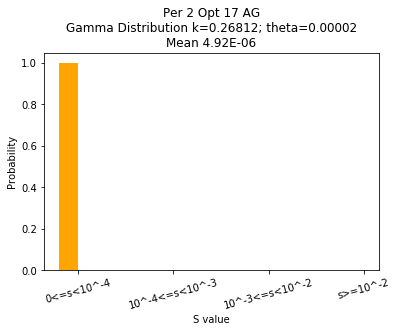

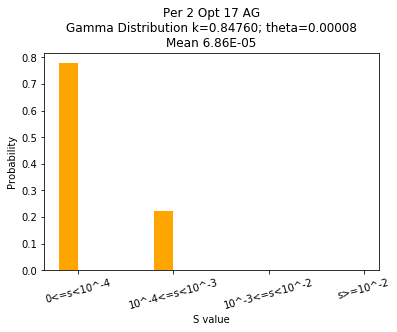

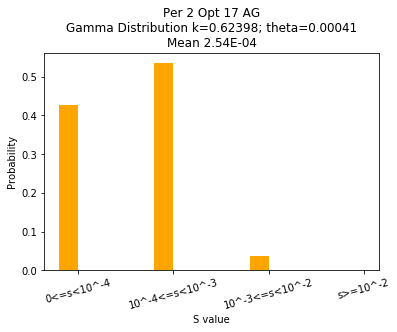

(4.788456476627121e-05, 4.5981098786567765e-05, 4.978803074597465e-05)
AT number a,b pairs accepted: 888


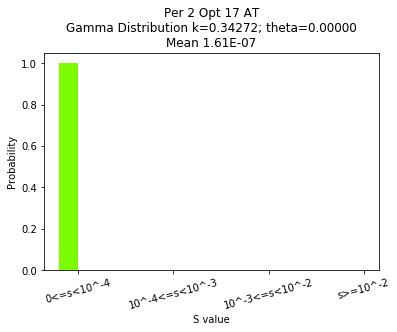

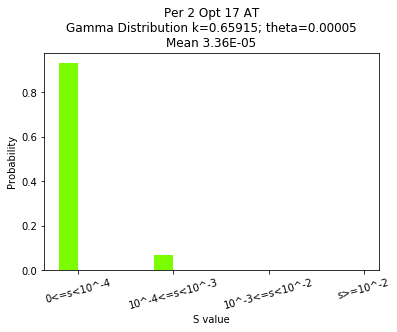

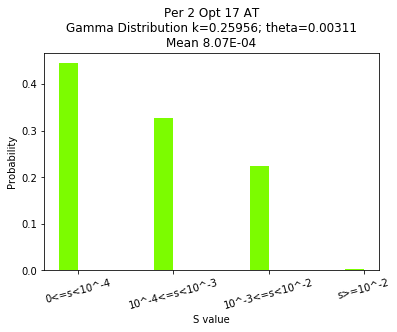

(3.850135401281877e-05, 3.571954266546786e-05, 4.128316536016968e-05)


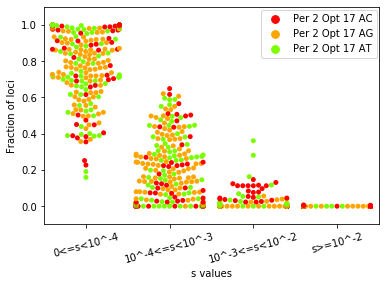

AC number a,b pairs accepted: 1244


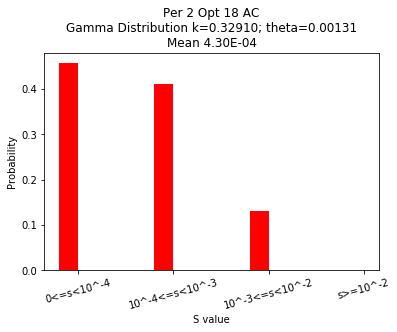

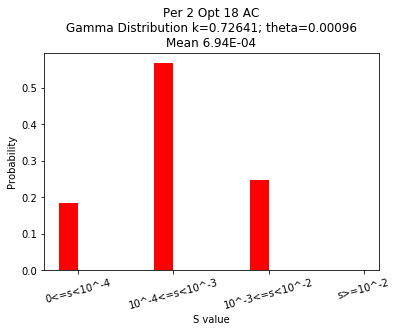

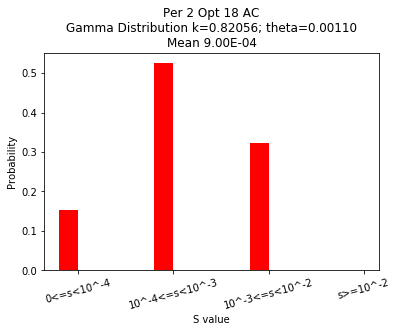

(0.0003679362163427035, 0.00036378822195828344, 0.00037208421072712353)
AG number a,b pairs accepted: 2


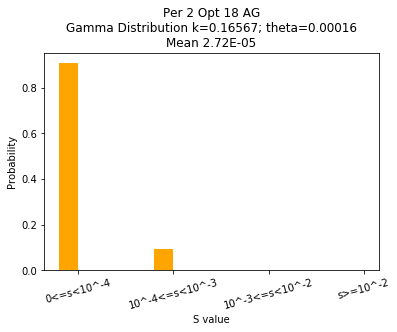

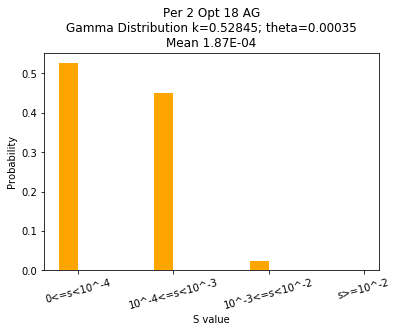

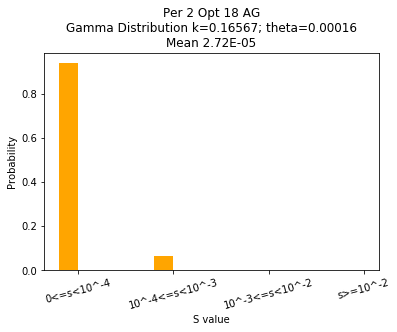

(4.801365854397572e-05, 1.4720845662340021e-05, 8.130647142561142e-05)
AT number a,b pairs accepted: 83


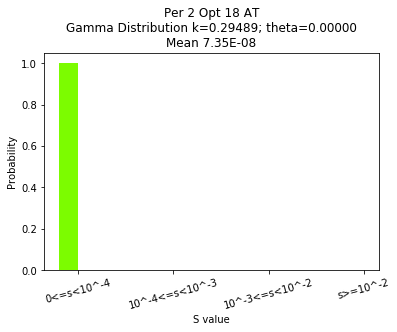

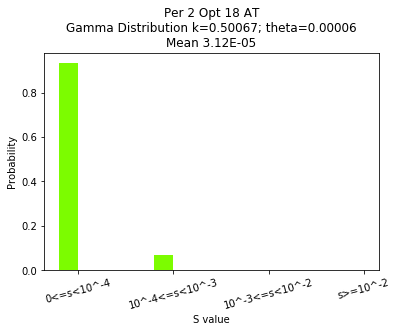

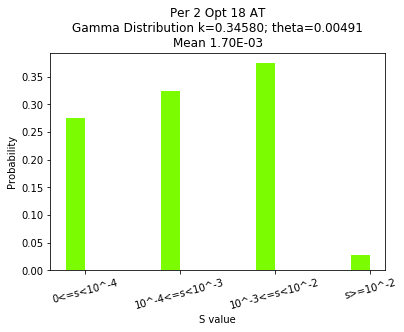

(4.9871650880157894e-05, 3.836987132768248e-05, 6.13734304326333e-05)


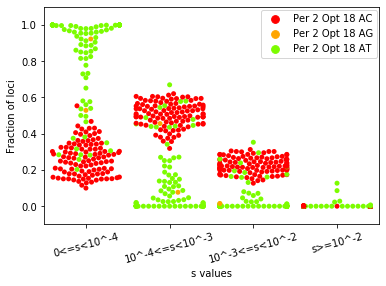

AC number a,b pairs accepted: 103


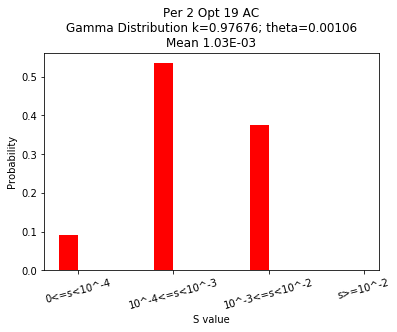

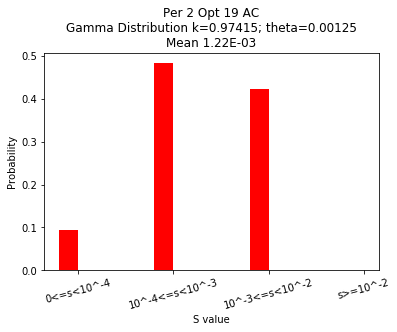

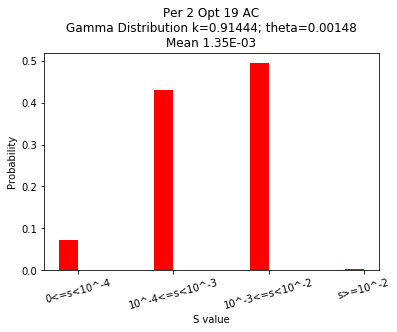

(0.0008051096339985723, 0.0007928387732904755, 0.0008173804947066691)
AG number a,b pairs accepted: 107


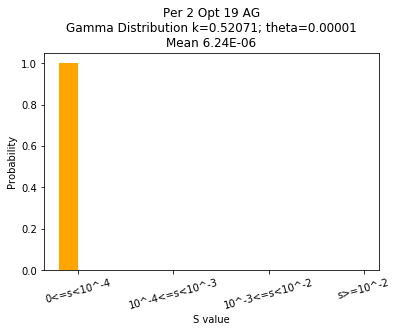

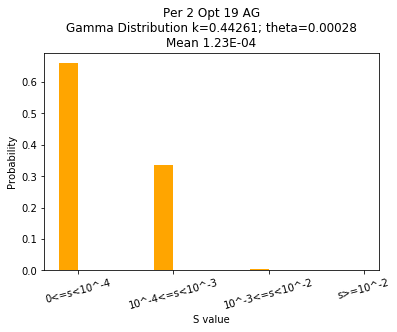

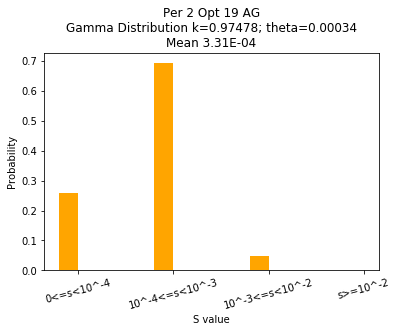

(7.436183260039565e-05, 6.910168871056437e-05, 7.962197649022694e-05)
AT number a,b pairs accepted: 475


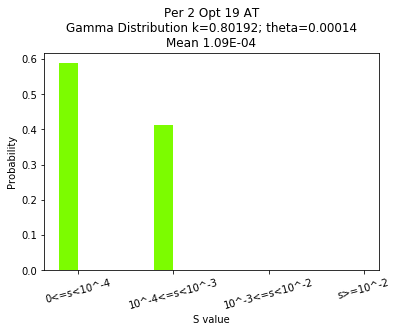

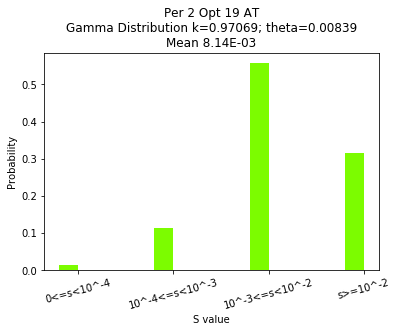

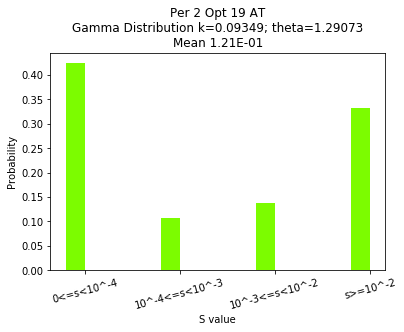

(0.0069635054096716855, 0.005120445182557281, 0.00880656563678609)


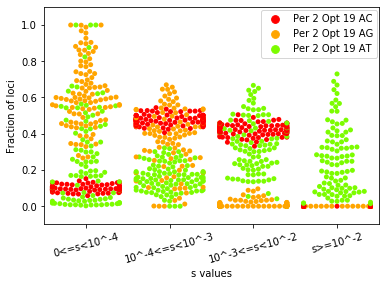

AC number a,b pairs accepted: 122


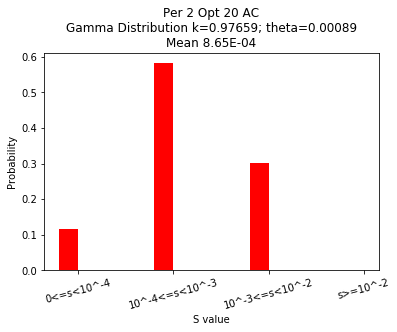

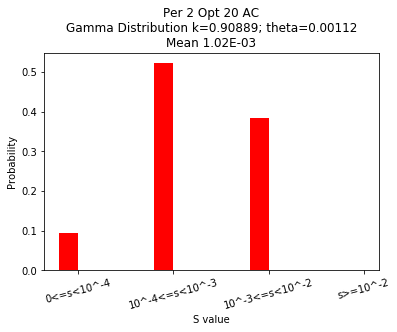

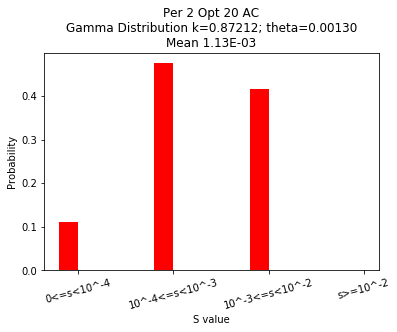

(0.0006707419001885967, 0.0006599236830810146, 0.0006815601172961788)
AG number a,b pairs accepted: 406


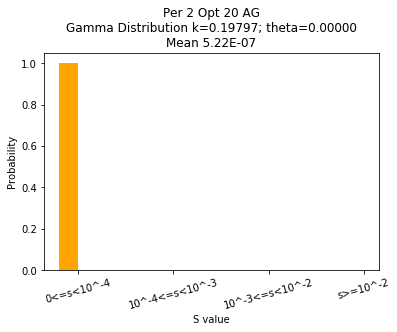

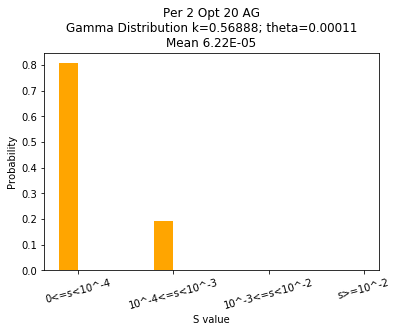

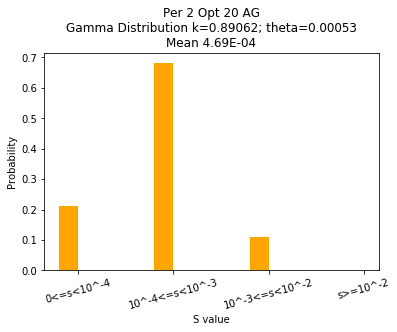

(4.810412314166394e-05, 4.4918846257881715e-05, 5.128940002544616e-05)
AT number a,b pairs accepted: 4160


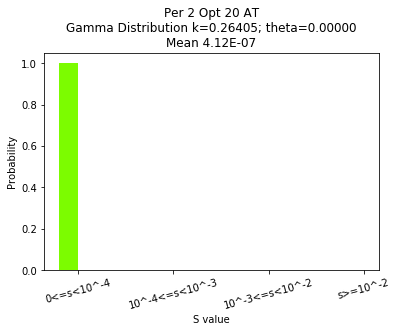

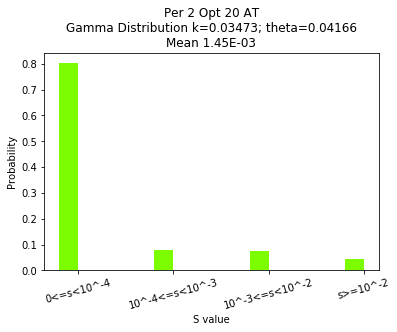

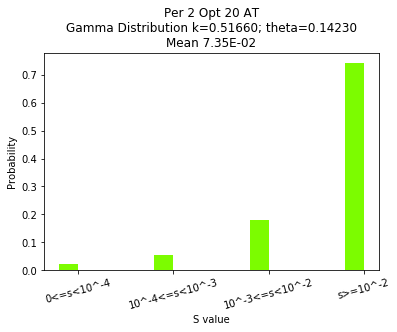

(0.004571118615442492, 0.004058262248425154, 0.00508397498245983)


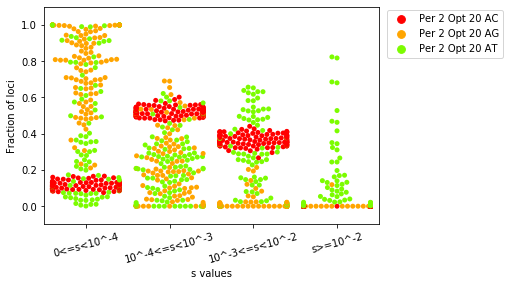

Running period: 3
AAC number a,b pairs accepted: 2


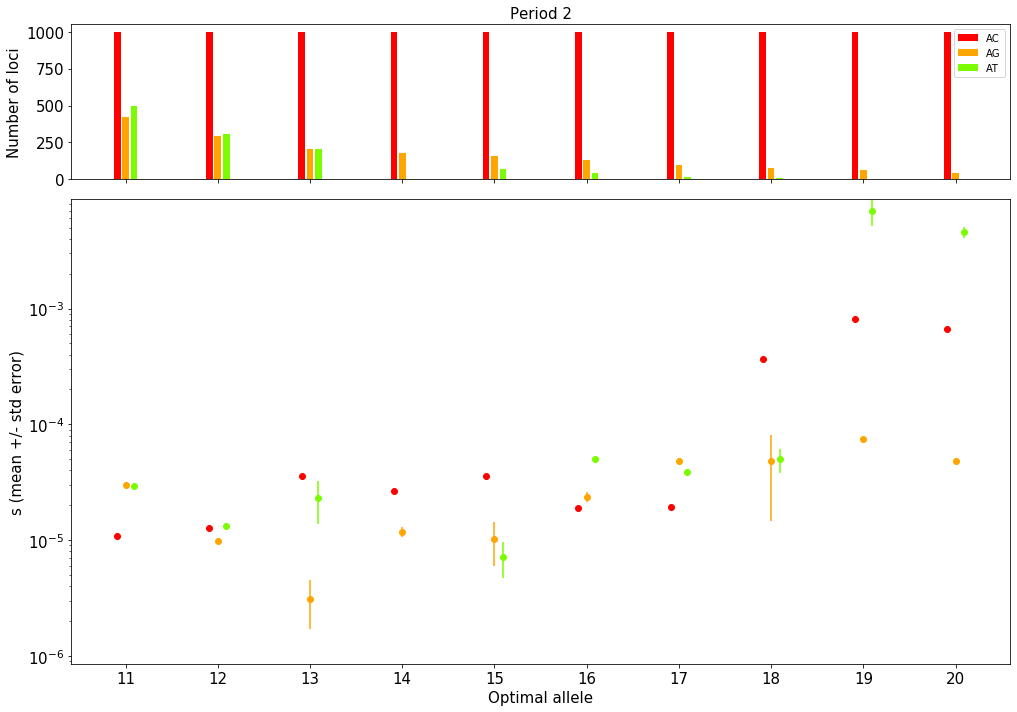

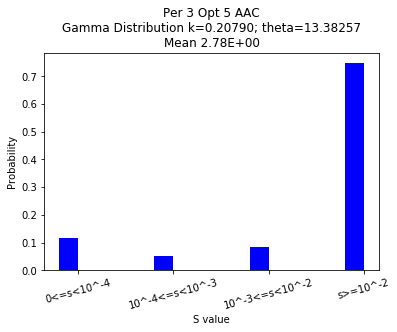

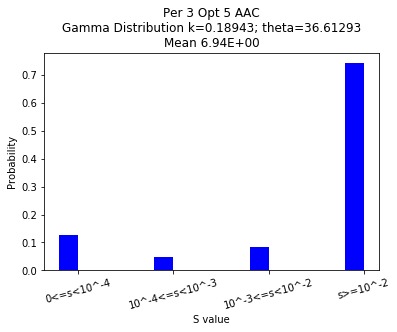

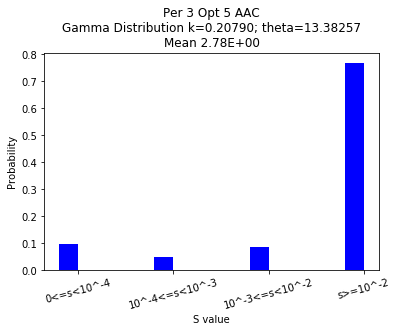

(0.3811837602762969, 0.3622783176556018, 0.400089202896992)
AAG number a,b pairs accepted: 1050


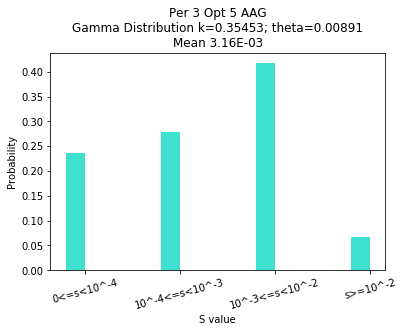

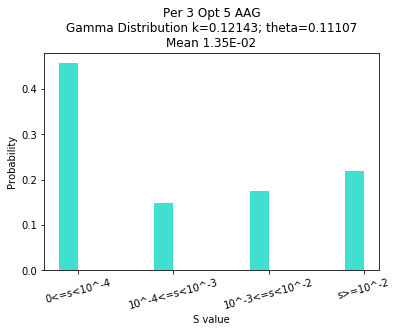

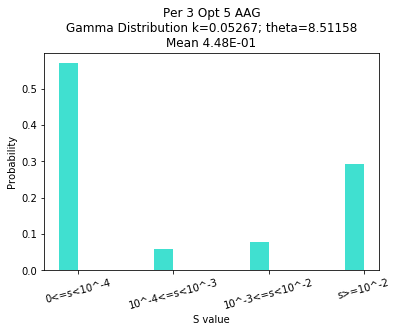

(0.001298277882702467, 0.00125511066665964, 0.0013414450987452938)
AAT number a,b pairs accepted: 5


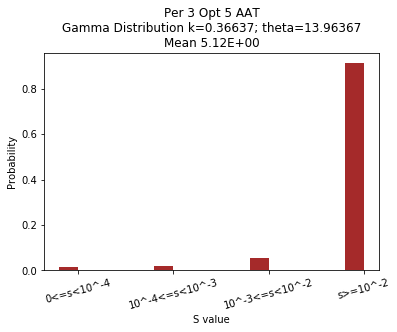

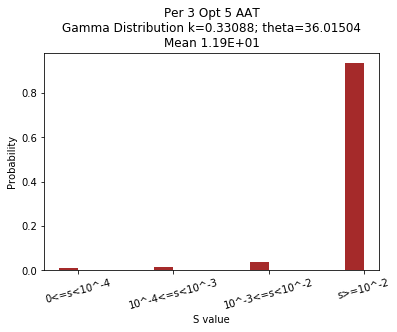

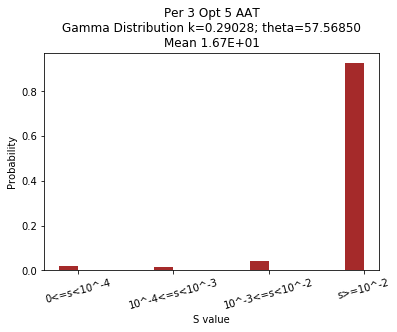

(1.0, 1.0, 1.0)
ACC number a,b pairs accepted: 18549


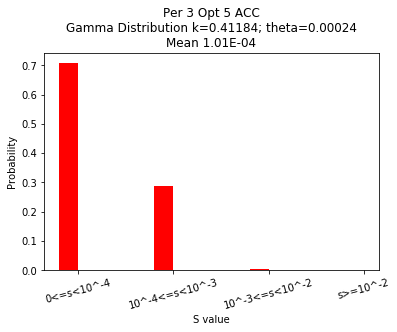

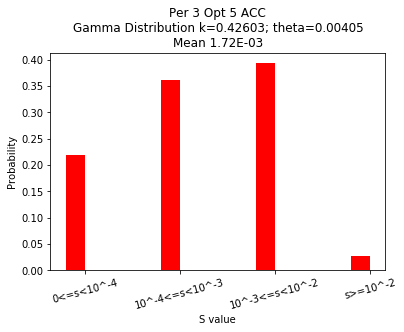

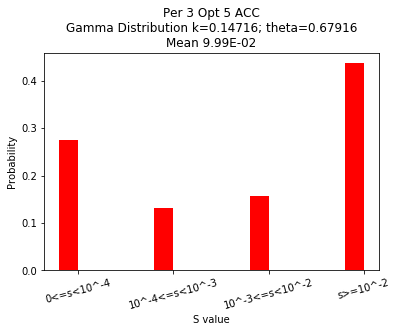

(0.001882723474537994, 0.0018171344323091446, 0.0019483125167668433)
AGC number a,b pairs accepted: 21931


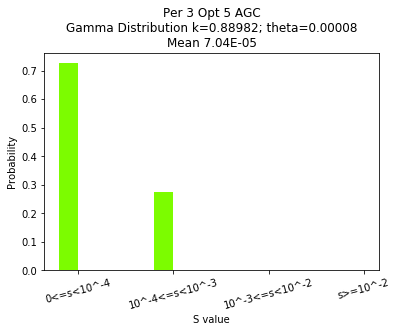

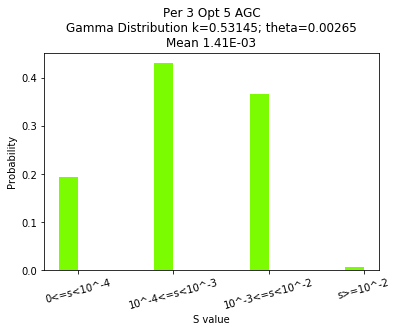

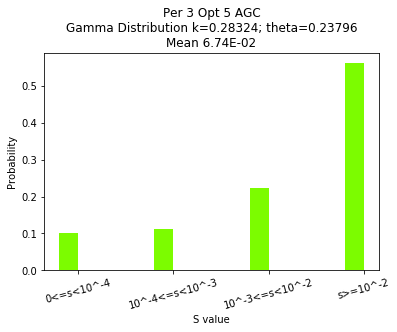

(0.0014407617225161765, 0.0014142461835846176, 0.0014672772614477353)
AGG number a,b pairs accepted: 32024


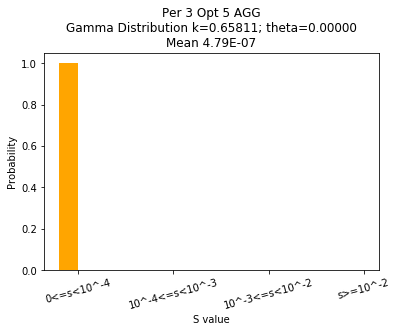

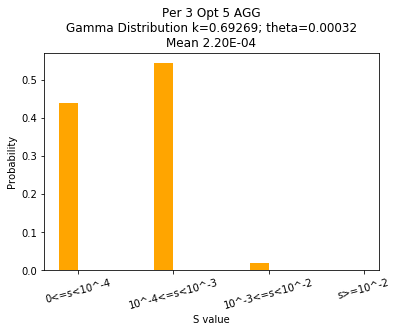

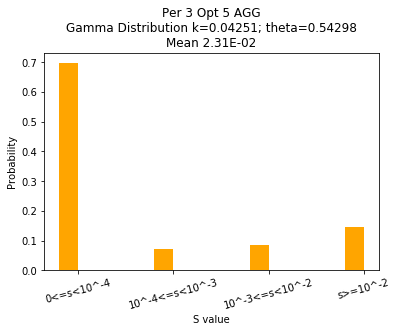

(0.00022982788588913507, 0.0002259353323707317, 0.00023372043940753844)
ATC number a,b pairs accepted: 34001


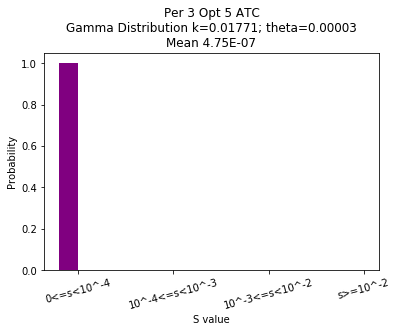

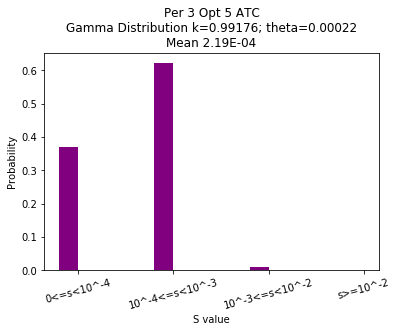

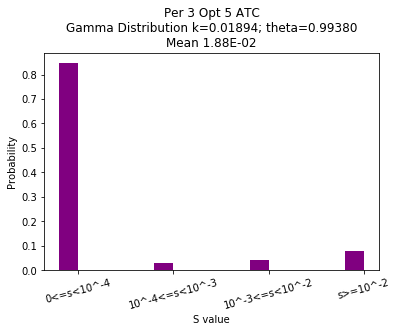

(0.0002600031330983645, 0.00025657907888980604, 0.00026342718730692295)
CCG number a,b pairs accepted: 2823


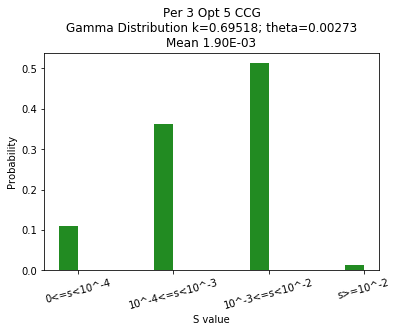

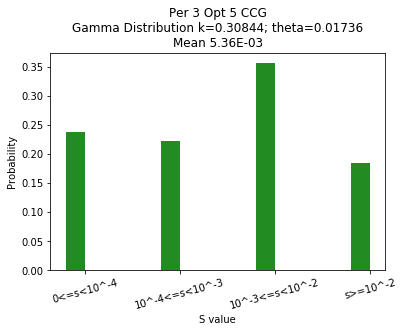

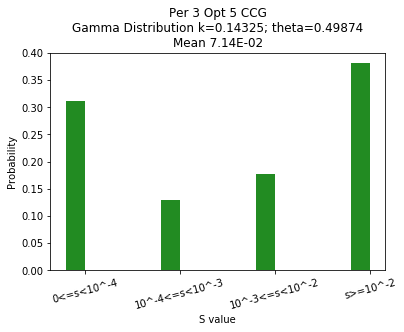

(0.0022383147723912472, 0.002210795724332816, 0.0022658338204496783)


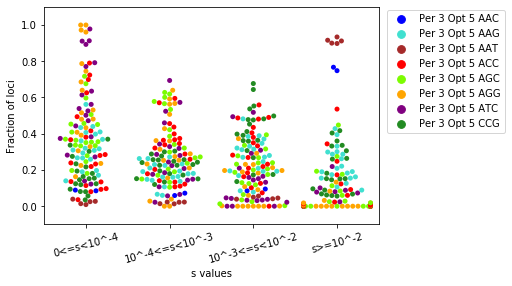

AAC number a,b pairs accepted: 35


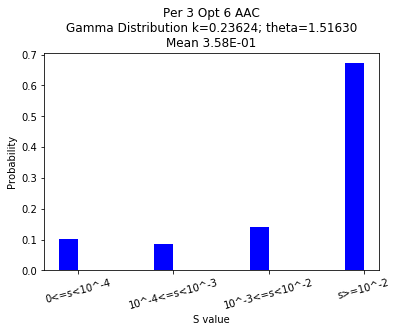

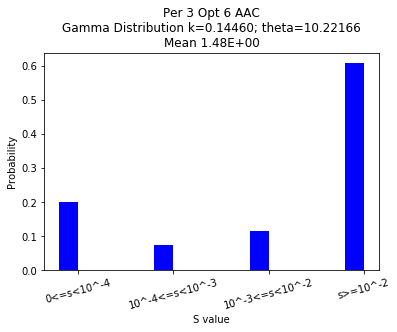

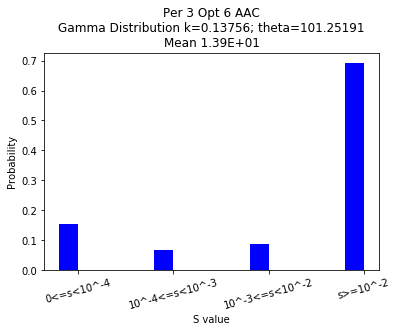

(0.14399270670237804, 0.1123308222723576, 0.17565459113239848)
AAG number a,b pairs accepted: 101


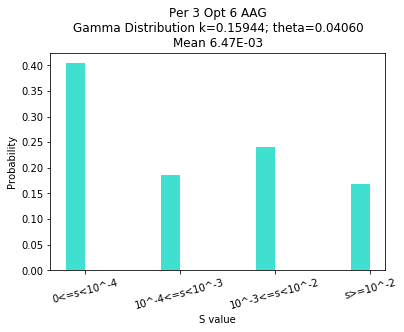

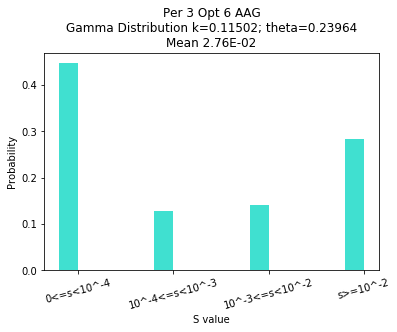

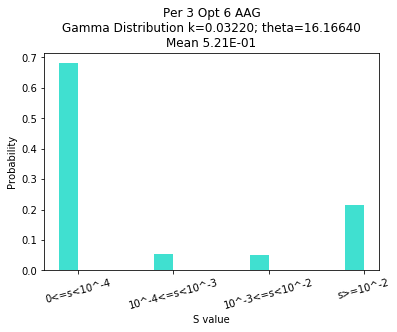

(0.00020731098577967246, 0.00017679378572116802, 0.0002378281858381769)
AAT number a,b pairs accepted: 8


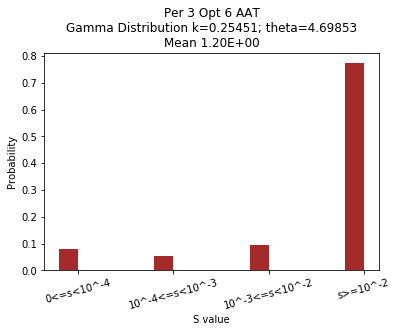

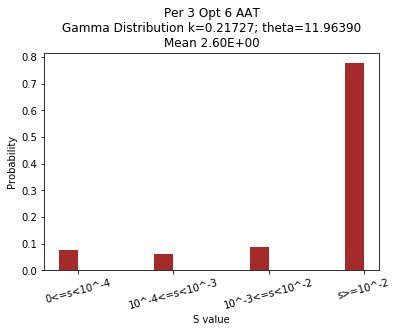

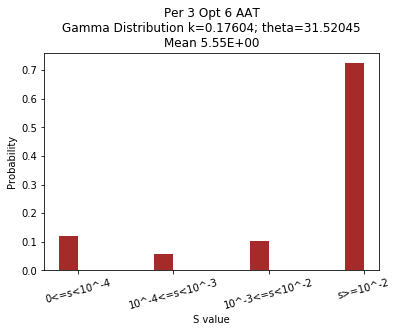

(0.5634087749967328, 0.4655498711617817, 0.6612676788316839)
ACC number a,b pairs accepted: 3888


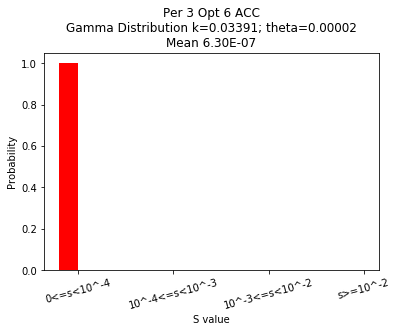

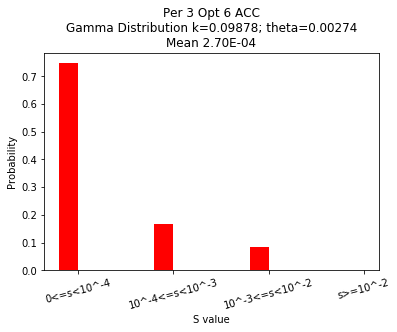

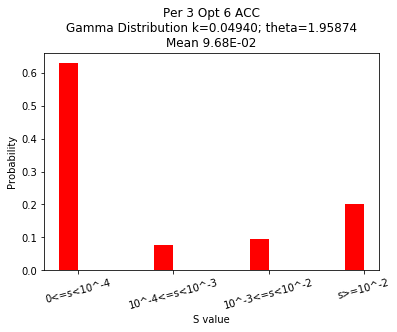

(6.239787744413999e-05, 5.9338361352027666e-05, 6.545739353625231e-05)
AGC number a,b pairs accepted: 14897


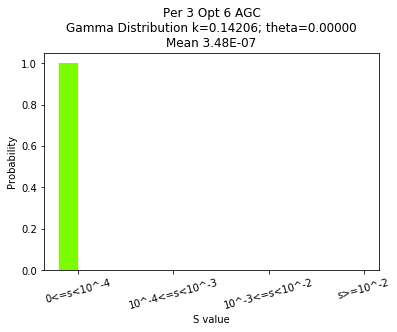

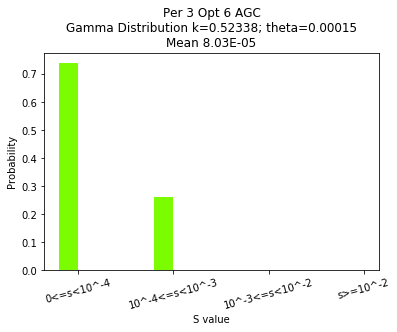

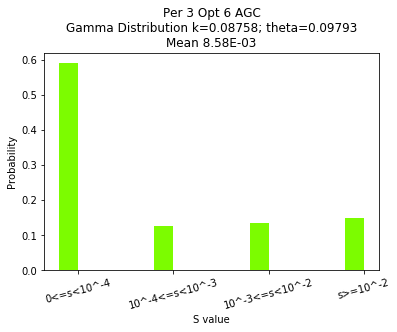

(3.507189988742433e-05, 3.4564398192868804e-05, 3.557940158197986e-05)
AGG number a,b pairs accepted: 15691


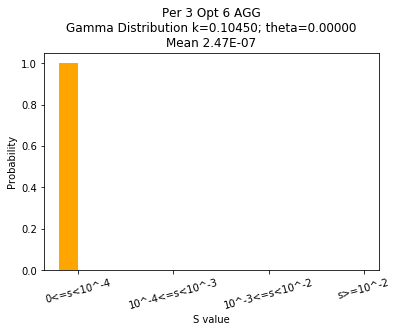

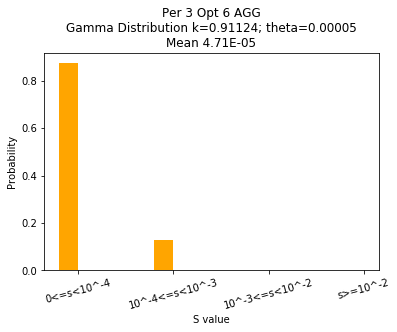

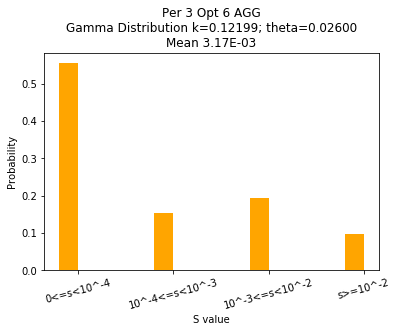

(2.2321043693403037e-05, 2.201759970680463e-05, 2.2624487680001443e-05)
ATC number a,b pairs accepted: 9876


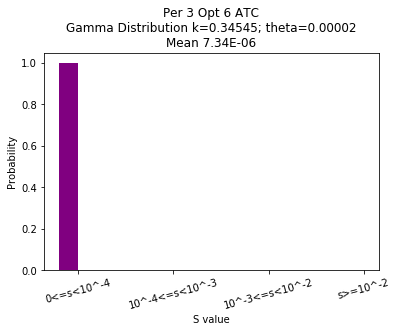

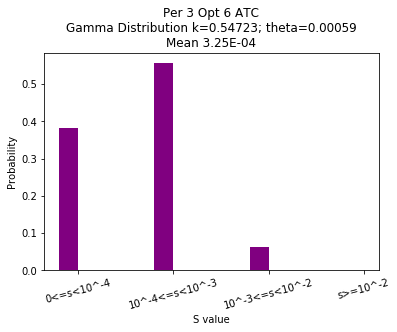

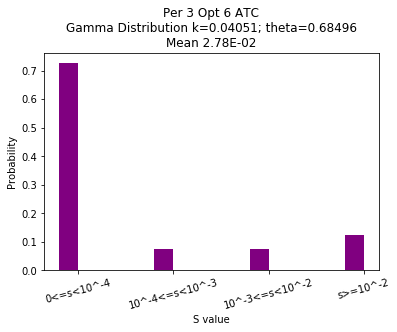

(0.00012429680839235968, 0.00012190835750441237, 0.00012668525928030697)
CCG number a,b pairs accepted: 541


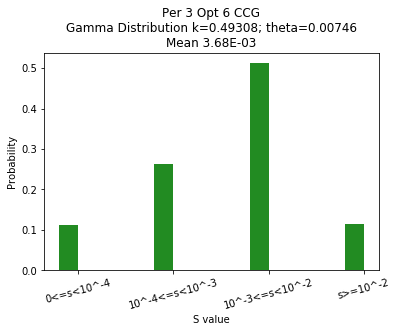

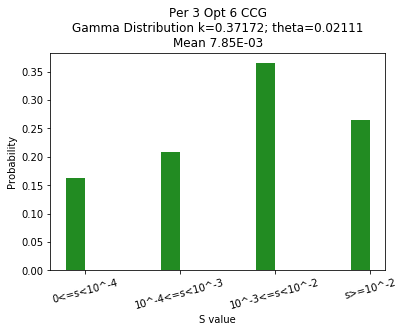

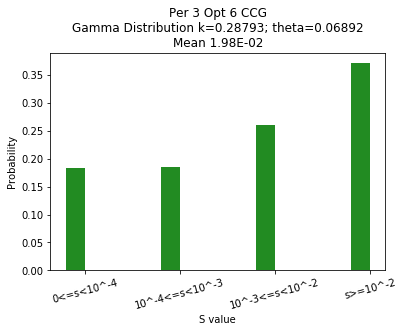

(0.0026111629125764586, 0.002554655133097659, 0.002667670692055258)


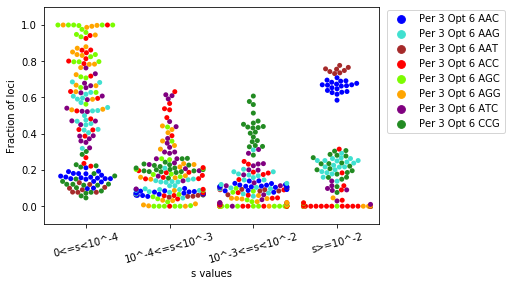

AAC number a,b pairs accepted: 33


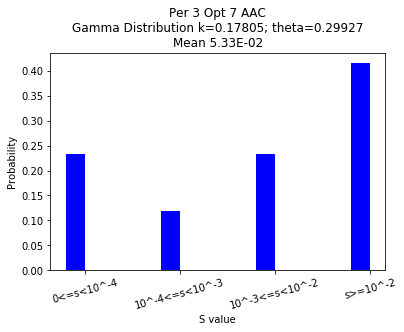

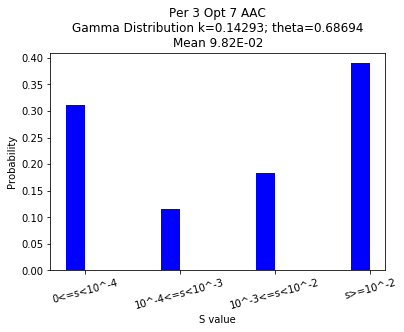

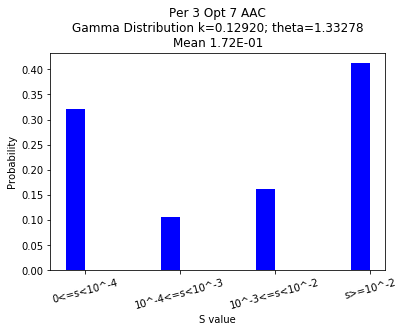

(0.004551925183894676, 0.003969064757350232, 0.00513478561043912)
AAG number a,b pairs accepted: 54


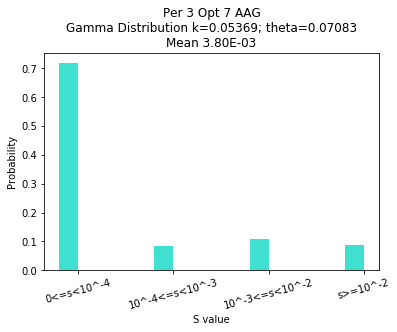

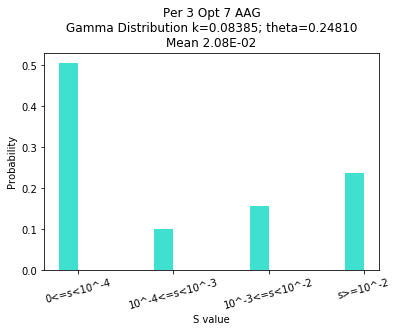

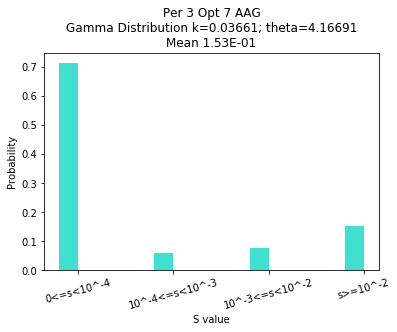

(2.855054085964621e-05, 1.7349144609788746e-05, 3.975193710950368e-05)
AAT number a,b pairs accepted: 5


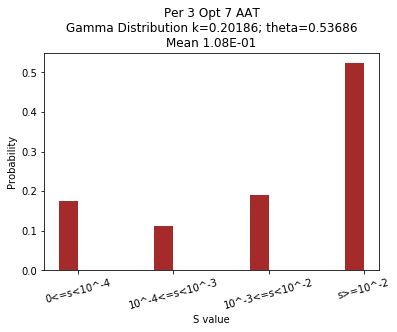

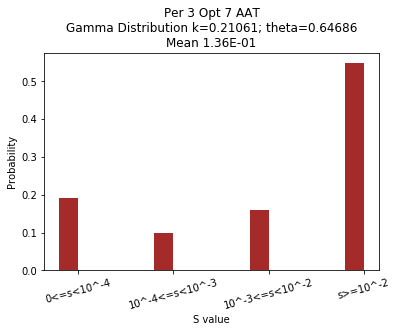

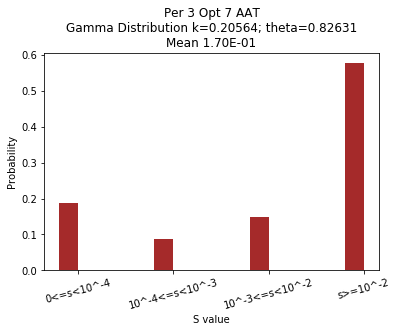

(0.01753077626512204, 0.015036231150144403, 0.02002532138009968)
ACC number a,b pairs accepted: 2848


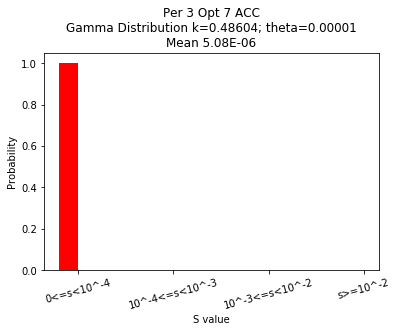

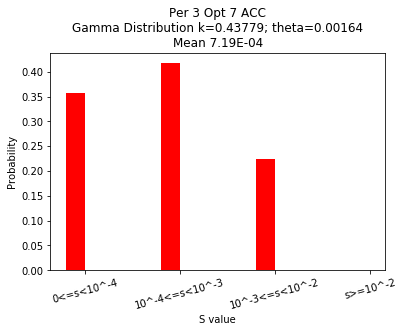

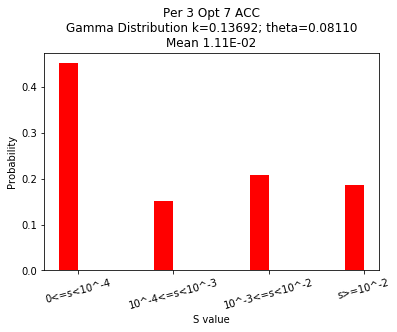

(0.00027336963273864385, 0.00026786589034711125, 0.00027887337513017645)
AGC number a,b pairs accepted: 934


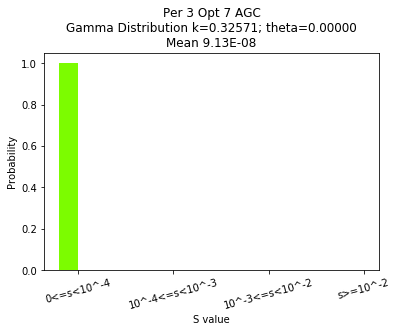

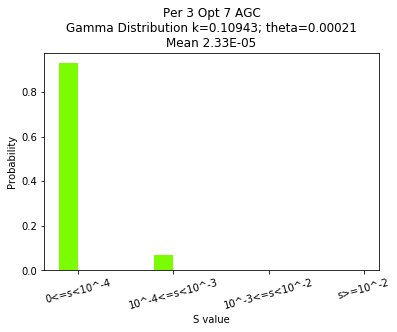

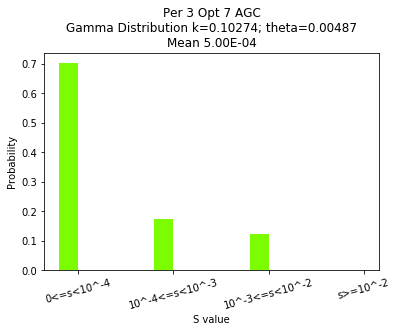

(1.6498078286838587e-05, 1.561412668807618e-05, 1.7382029885600993e-05)
AGG number a,b pairs accepted: 92


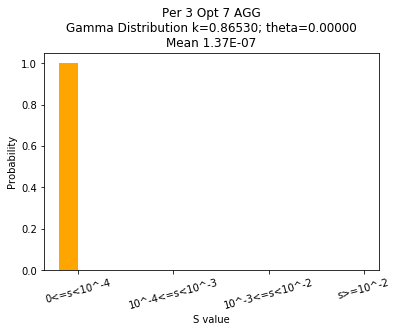

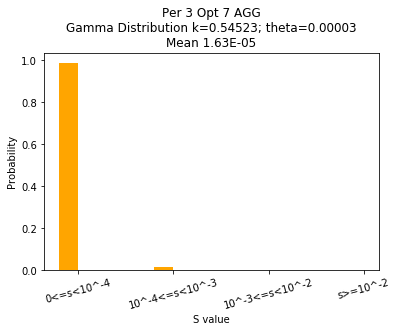

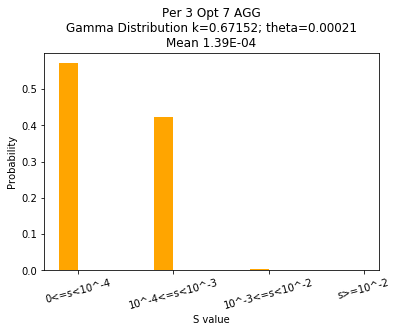

(1.5206931354297087e-05, 1.2500921350437383e-05, 1.791294135815679e-05)
ATC number a,b pairs accepted: 7466


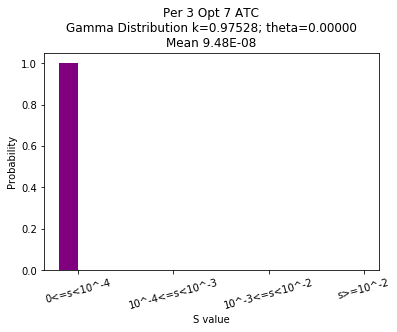

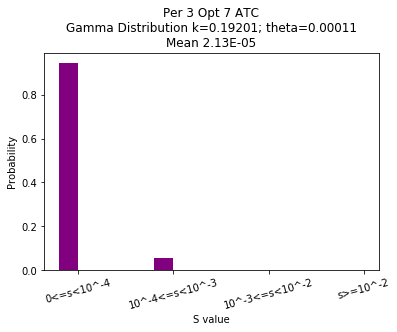

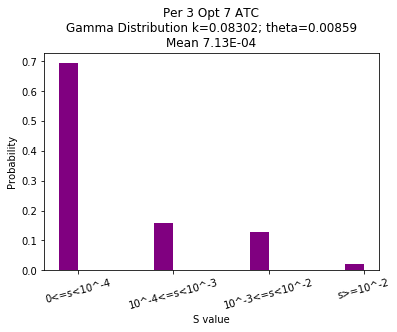

(1.6195831677002477e-05, 1.586297367210787e-05, 1.6528689681897084e-05)
CCG number a,b pairs accepted: 128


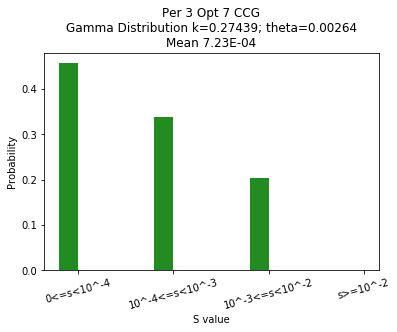

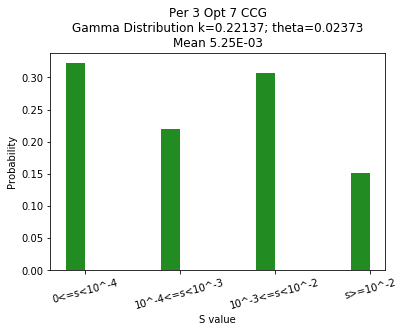

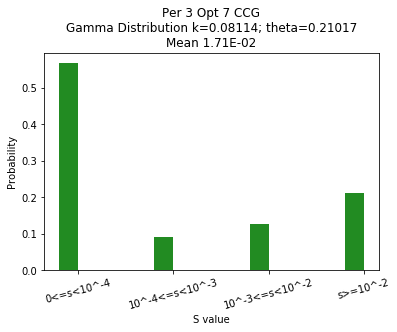

(0.0001495356687688591, 0.00012387391787241955, 0.00017519741966529864)


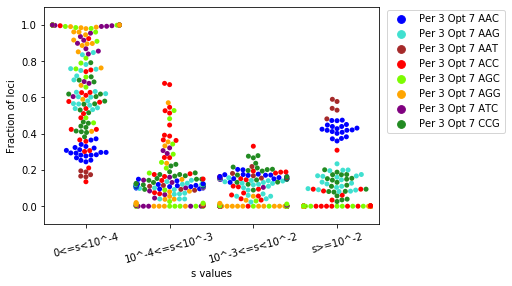

AAC number a,b pairs accepted: 58


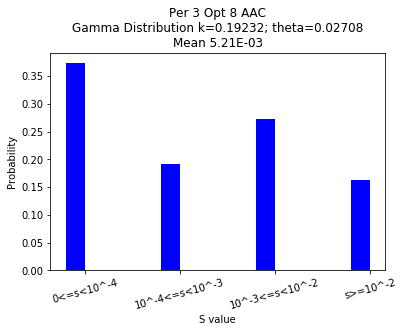

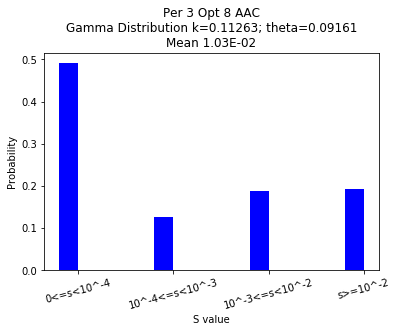

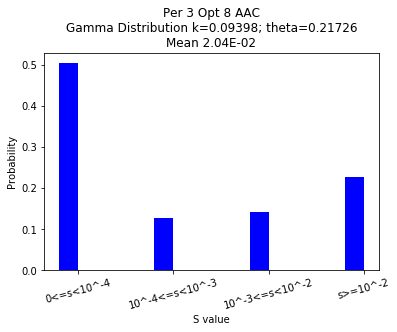

(0.0003306460395766765, 0.00029250946611909903, 0.00036878261303425396)
AAG number a,b pairs accepted: 612


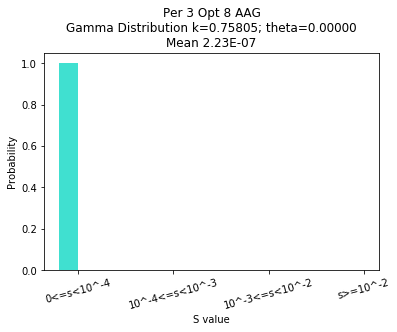

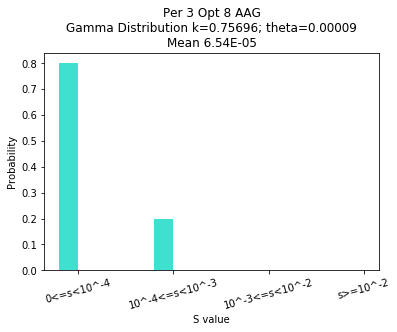

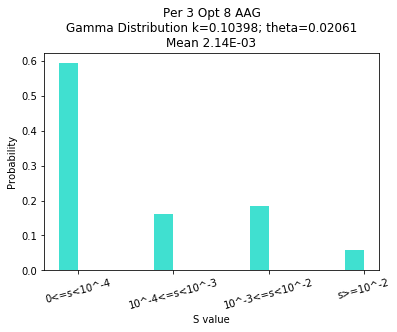

(3.111421991951825e-05, 2.880399200696102e-05, 3.3424447832075484e-05)
ACC number a,b pairs accepted: 7


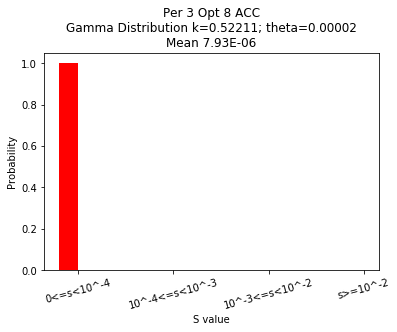

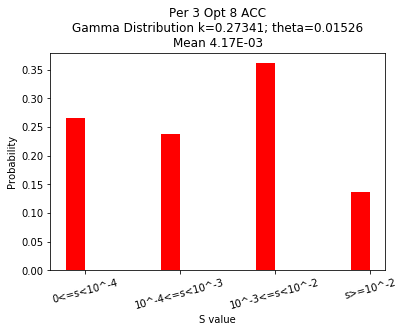

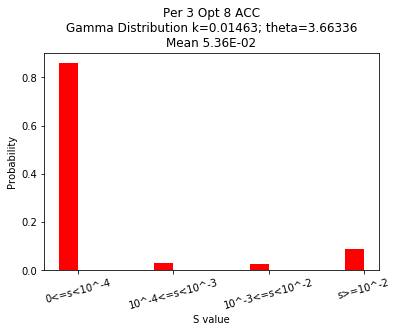

(0.0005273736777488601, 0.00019719398218442702, 0.0008575533733132932)
AGC number a,b pairs accepted: 67


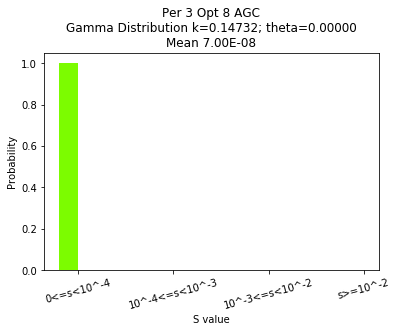

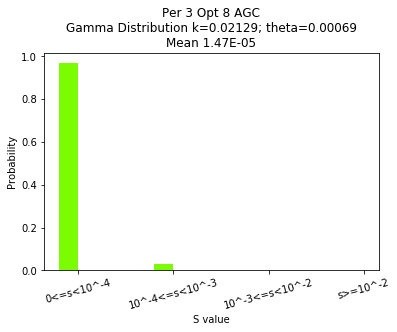

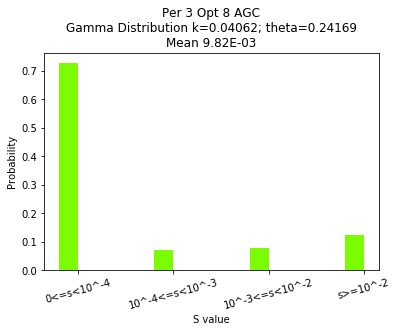

(8.021911713351841e-06, 6.331755392047258e-06, 9.712068034656425e-06)
AGG number a,b pairs accepted: 35


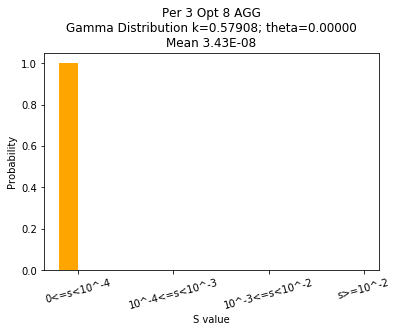

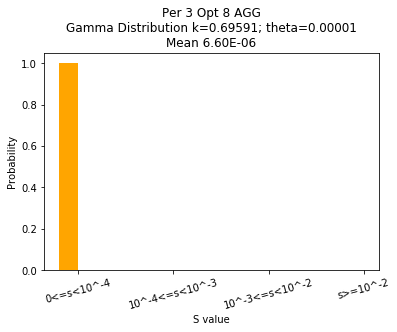

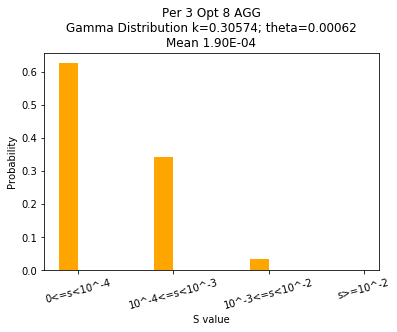

(6.791370487387947e-06, 4.410017063353304e-06, 9.17272391142259e-06)
ATC number a,b pairs accepted: 52


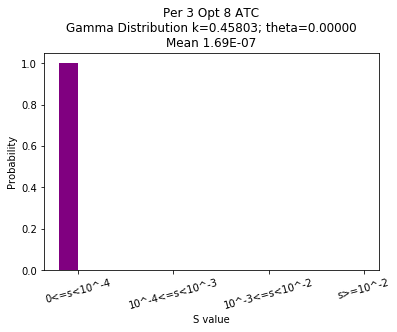

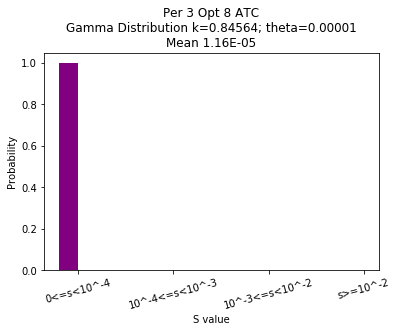

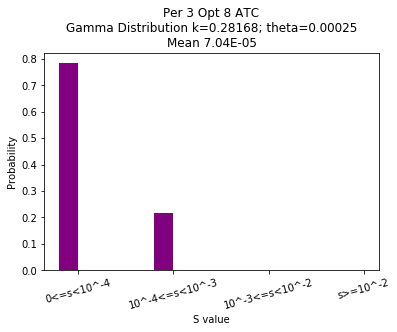

(5.906458745948306e-06, 4.805404308779864e-06, 7.007513183116748e-06)
CCG number a,b pairs accepted: 9


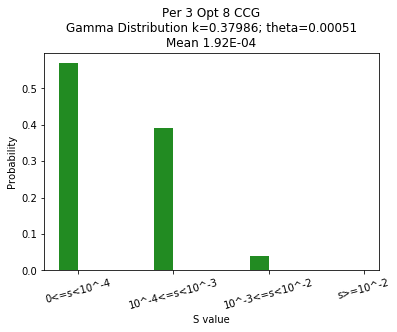

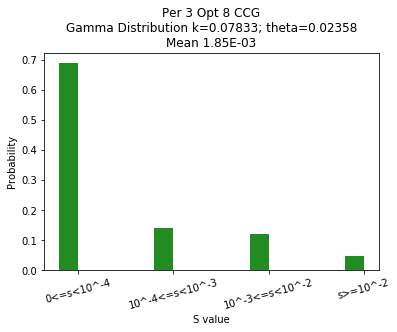

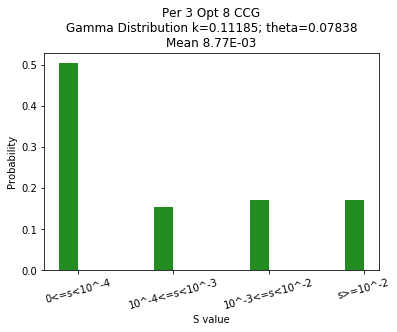

(0.00014999595014785524, 0.00011164495217065698, 0.0001883469481250535)


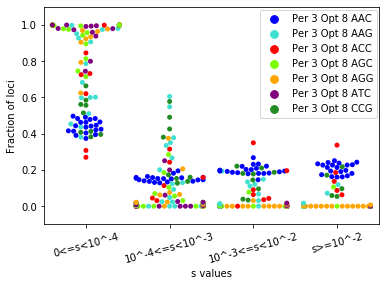

AAC number a,b pairs accepted: 385


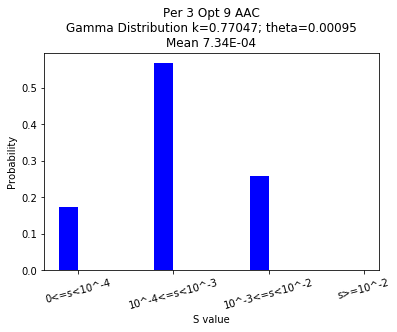

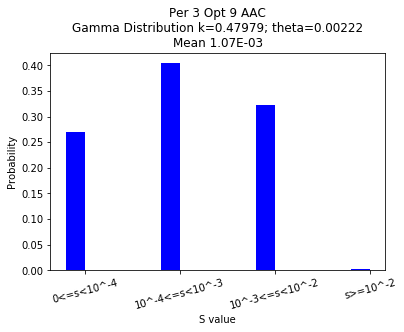

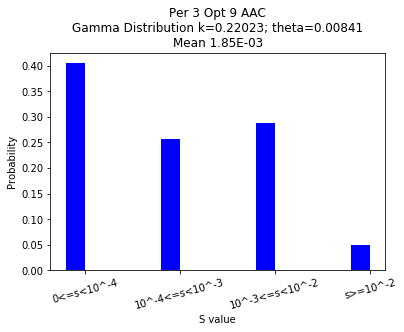

(0.00038092694792905206, 0.00037258989829901454, 0.0003892639975590896)
ACC number a,b pairs accepted: 1


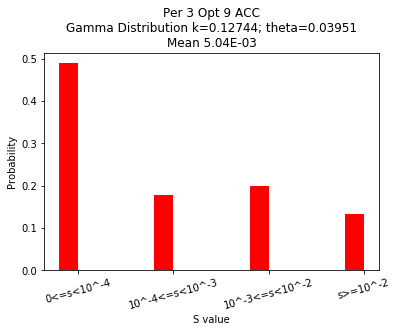

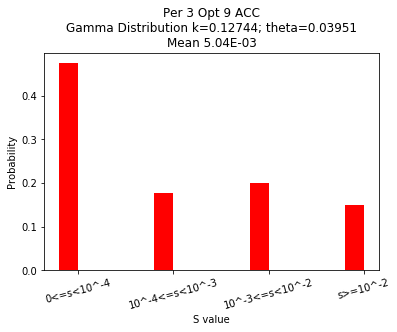

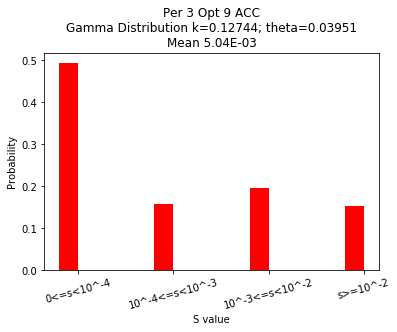

(0.00010394264044275744, 0.00010394264044275744, 0.00010394264044275744)
AGG number a,b pairs accepted: 675


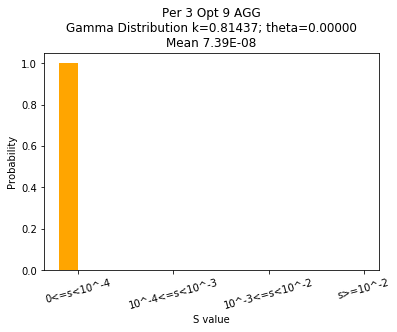

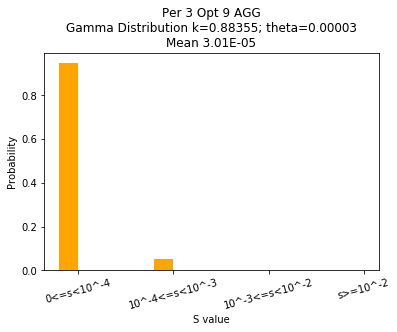

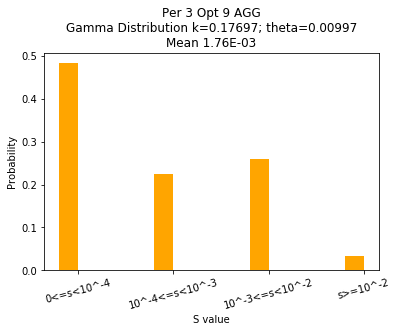

(2.3859101923187636e-05, 2.2001657231748173e-05, 2.57165466146271e-05)
ATC number a,b pairs accepted: 397


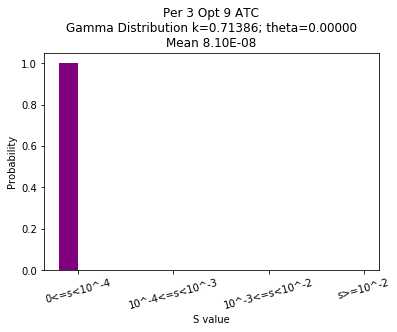

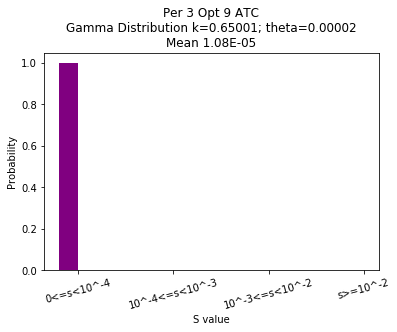

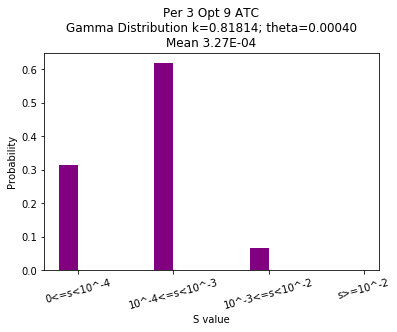

(8.425057006983664e-06, 7.504927695744361e-06, 9.345186318222967e-06)
CCG number a,b pairs accepted: 20


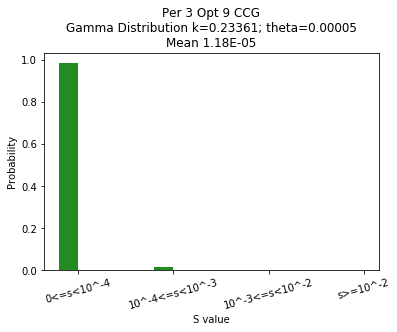

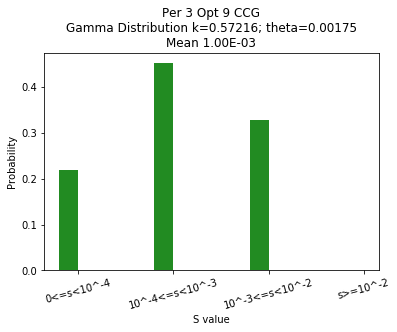

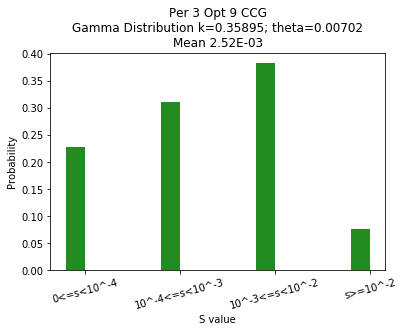

(0.00044387346707060844, 0.00038509646050912083, 0.000502650473632096)


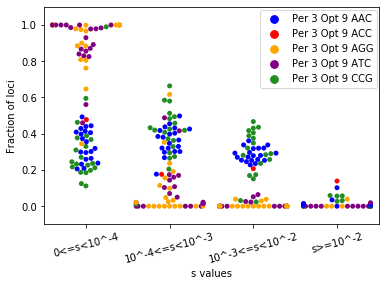

AAC number a,b pairs accepted: 334


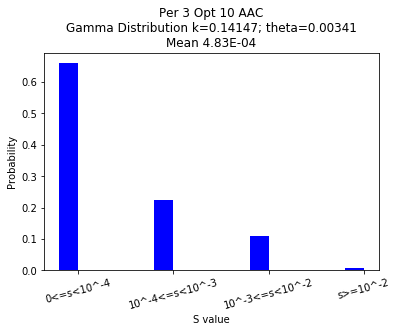

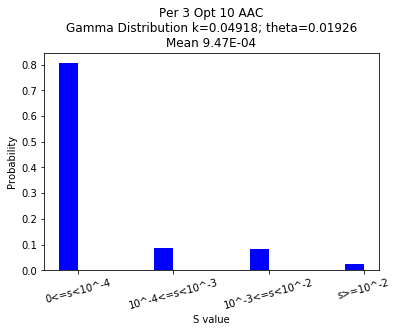

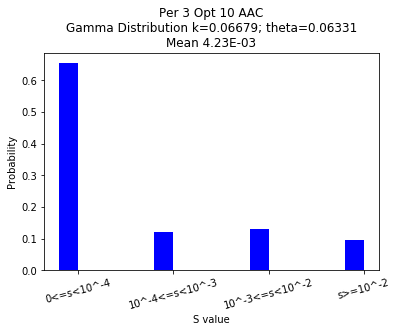

(7.657306022811331e-05, 7.177545063763273e-05, 8.137066981859389e-05)
AAG number a,b pairs accepted: 1418


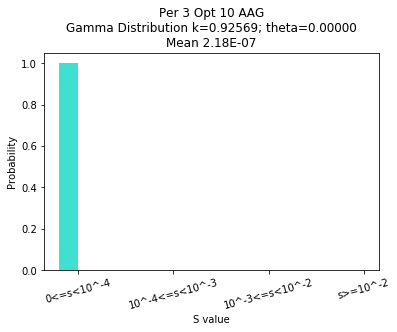

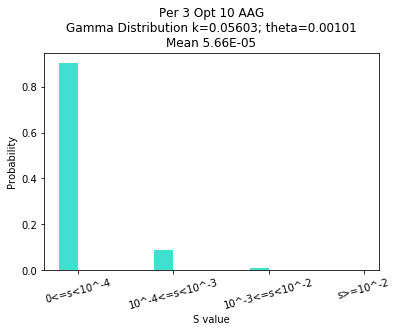

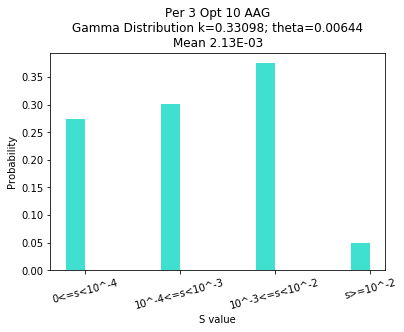

(6.178133940830574e-05, 5.7921958646189025e-05, 6.564072017042246e-05)
AAT number a,b pairs accepted: 138


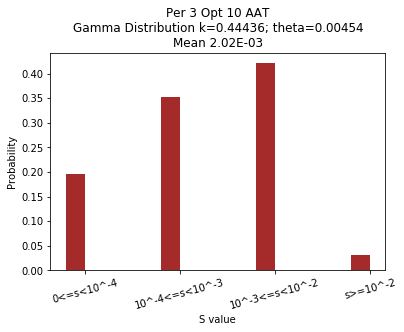

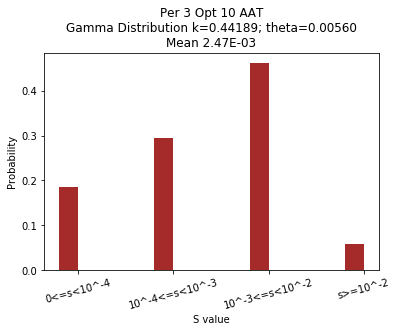

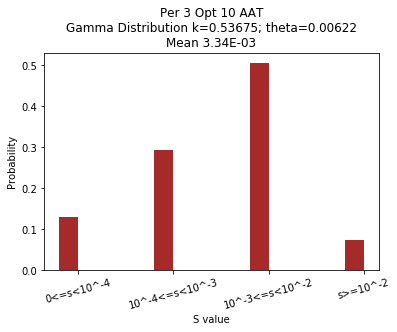

(0.0009807634599244312, 0.0009491320266734046, 0.0010123948931754579)
AGC number a,b pairs accepted: 62


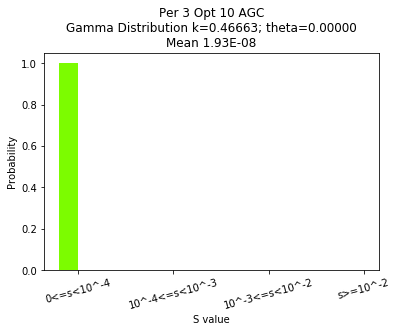

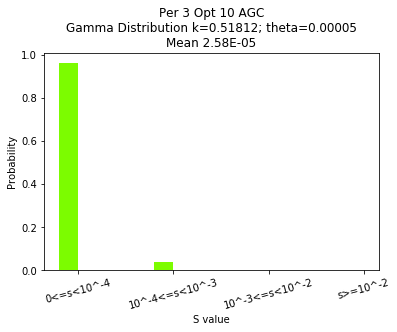

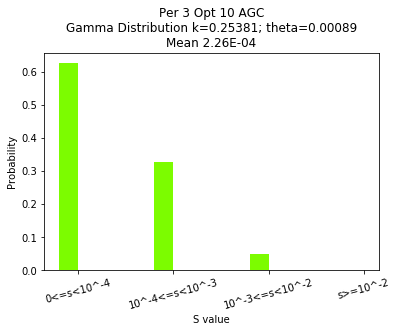

(1.6110672559724523e-05, 1.2947009295415423e-05, 1.9274335824033623e-05)
AGG number a,b pairs accepted: 2


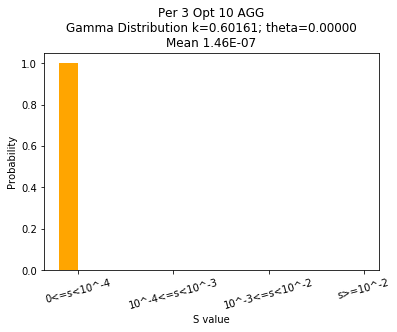

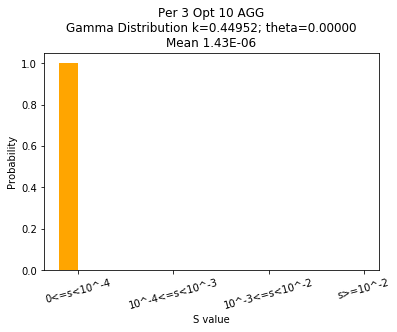

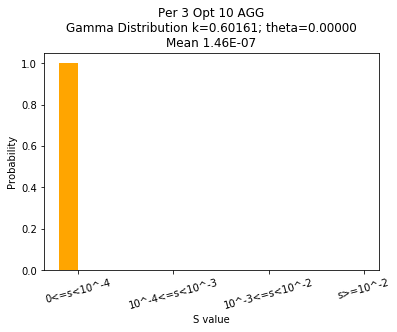

(5.054629602231777e-07, 2.1363356534059788e-07, 7.972923551057574e-07)
ATC number a,b pairs accepted: 678


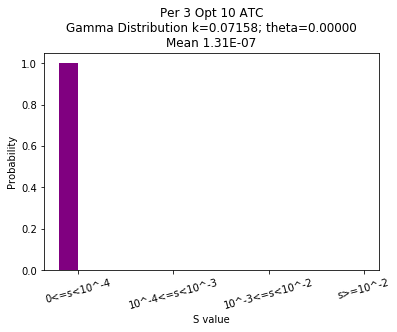

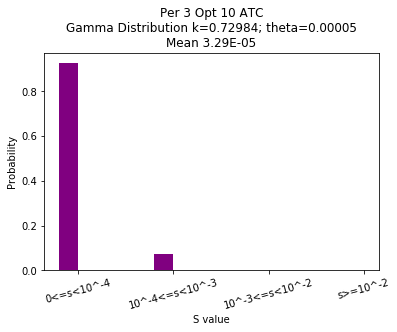

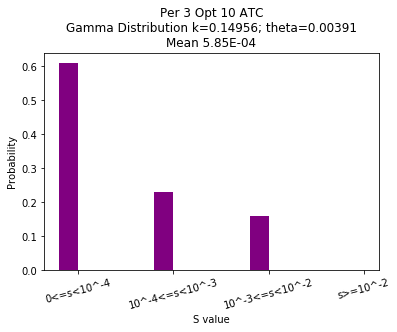

(2.2078855887440884e-05, 2.0762010653768936e-05, 2.3395701121112833e-05)
CCG number a,b pairs accepted: 15


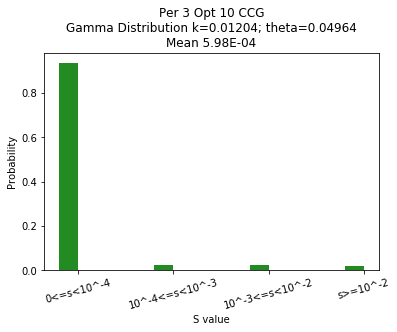

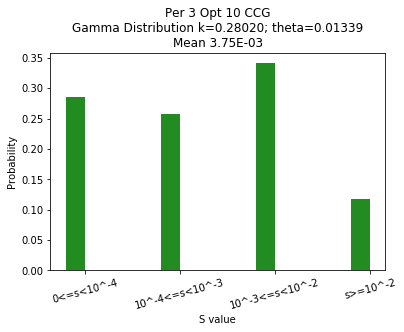

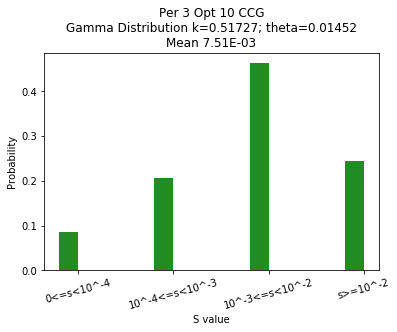

(0.002026467914021289, 0.0016604906342380659, 0.002392445193804512)


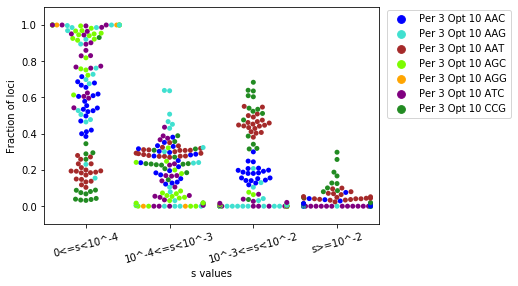

AAC number a,b pairs accepted: 187


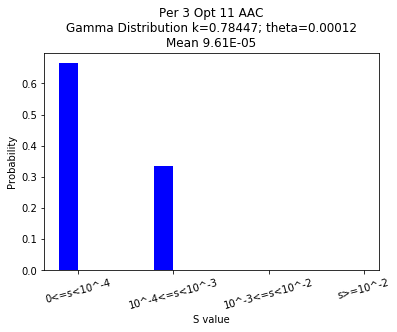

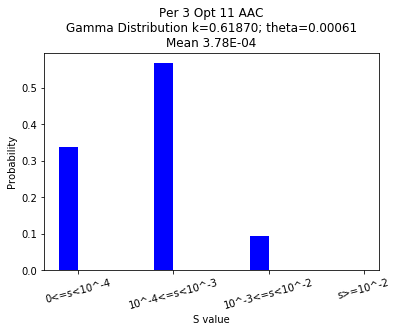

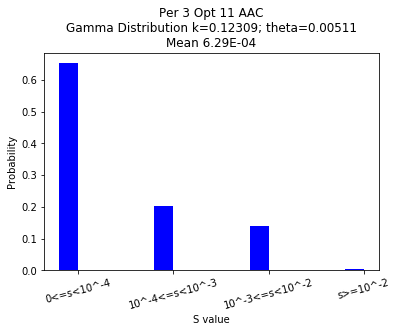

(0.0001334560564194711, 0.00012615488665467032, 0.00014075722618427187)
AAG number a,b pairs accepted: 10905


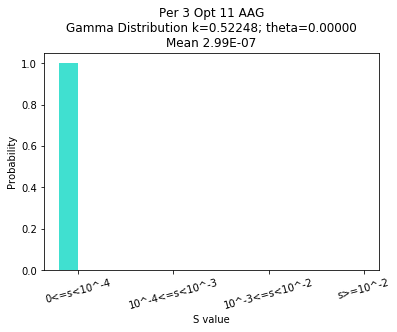

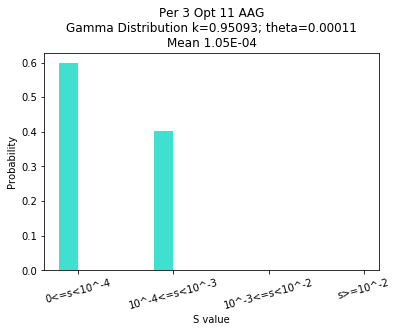

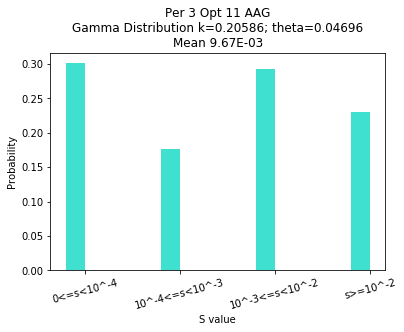

(0.00024246782341283958, 0.00022632927113948166, 0.0002586063756861975)
AAT number a,b pairs accepted: 376


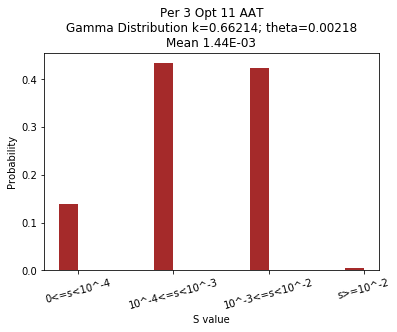

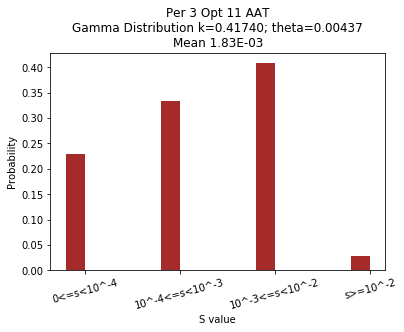

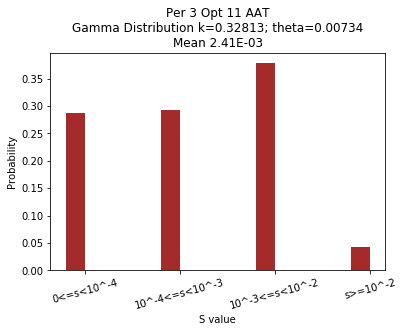

(0.0008669420811316354, 0.000851461695546946, 0.0008824224667163248)
ACC number a,b pairs accepted: 629


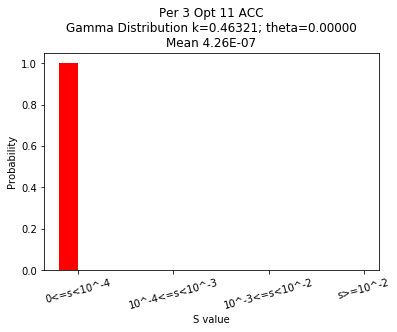

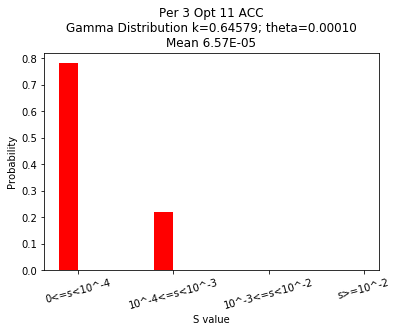

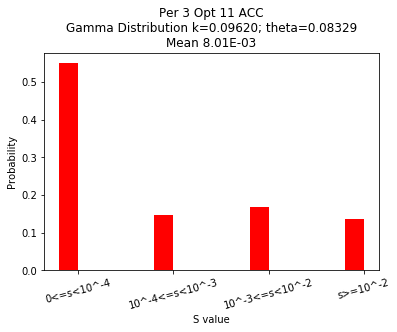

(6.734525105759102e-05, 5.89654402804796e-05, 7.572506183470244e-05)
AGG number a,b pairs accepted: 2038


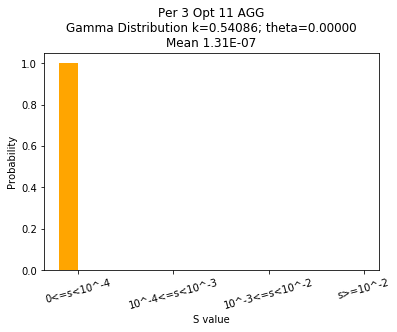

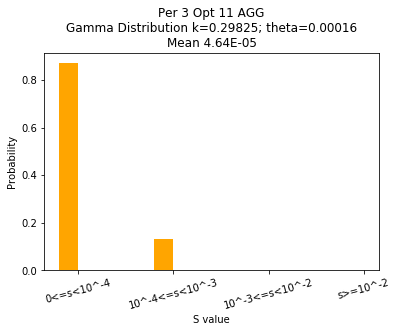

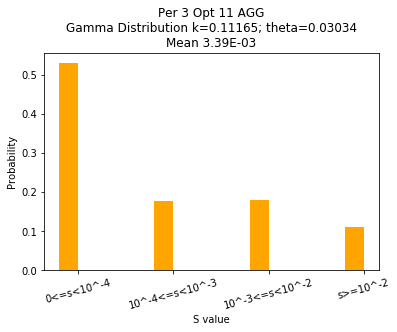

(6.955842437261484e-05, 6.0596118317776794e-05, 7.852073042745287e-05)
ATC number a,b pairs accepted: 1520


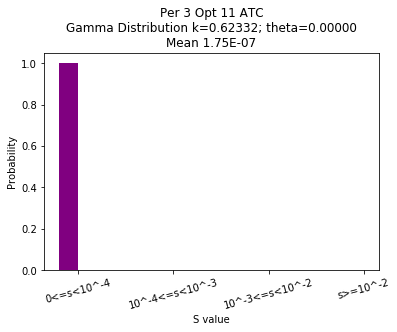

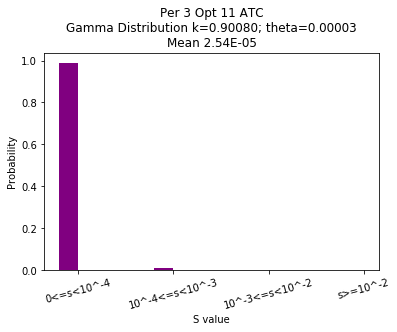

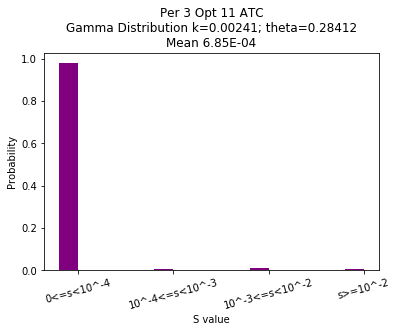

(1.7799182650270146e-05, 1.7046195628406882e-05, 1.855216967213341e-05)
CCG number a,b pairs accepted: 1640


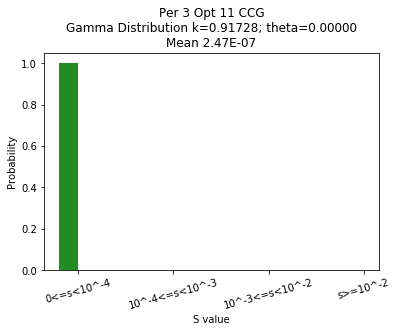

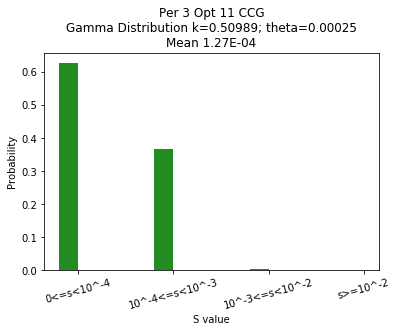

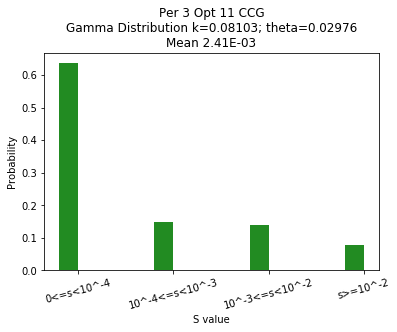

(0.0001345980136460579, 0.00012860296363950504, 0.00014059306365261077)


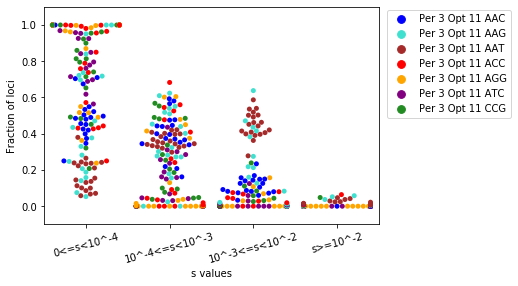

AAC number a,b pairs accepted: 3381


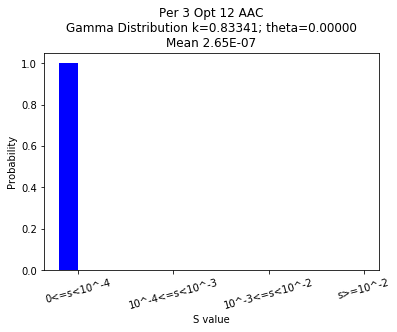

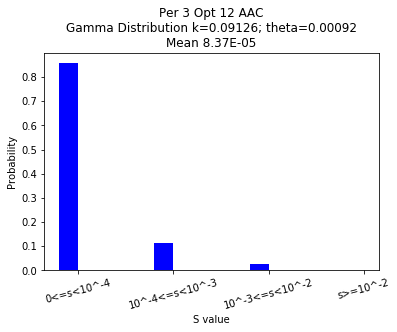

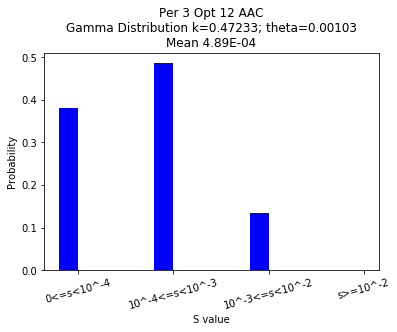

(5.163508561962176e-05, 5.0363263134196173e-05, 5.290690810504735e-05)
AAG number a,b pairs accepted: 8381


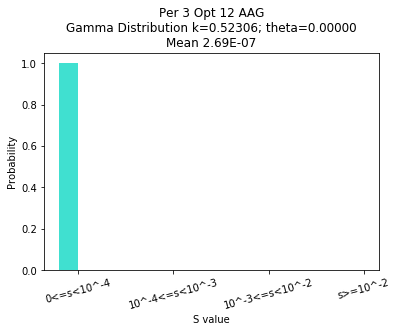

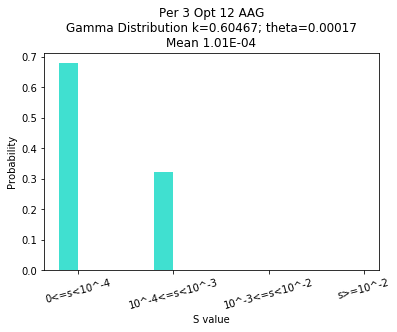

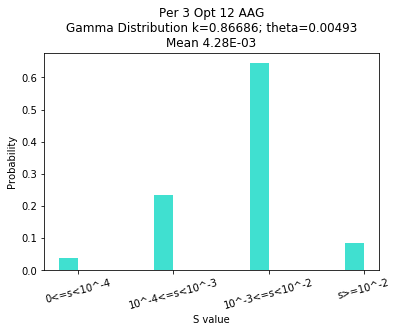

(0.0001566228851551876, 0.00015103109053278782, 0.00016221467977758737)
AAT number a,b pairs accepted: 1382


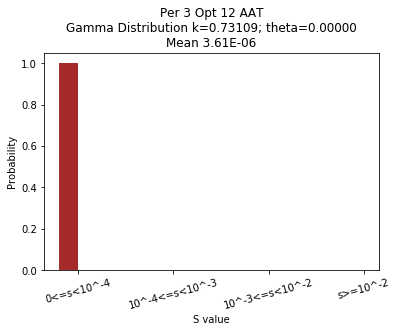

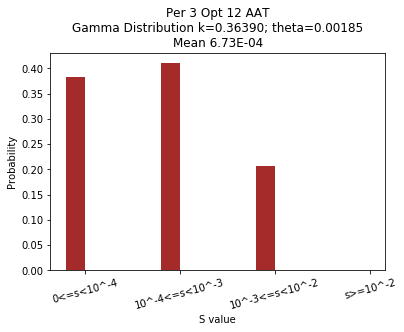

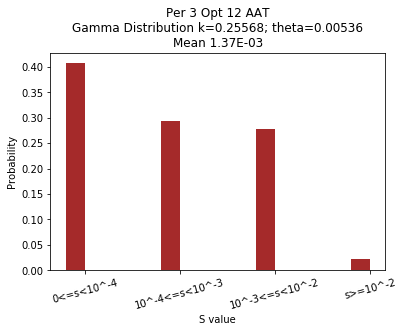

(0.0001127454569589509, 0.00010895650227996456, 0.00011653441163793723)
ACC number a,b pairs accepted: 9682


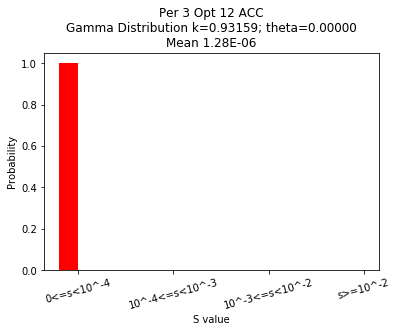

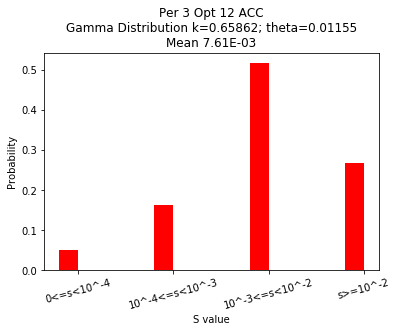

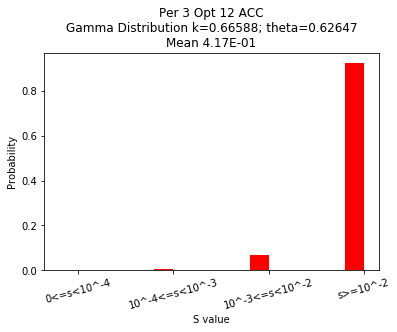

(0.0231319518118348, 0.022293040425308674, 0.023970863198360923)
AGC number a,b pairs accepted: 6


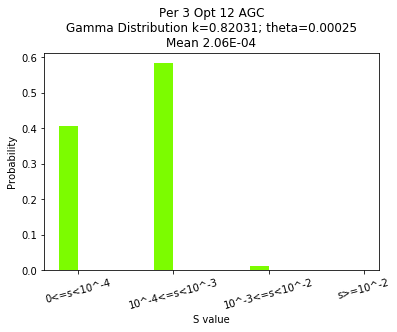

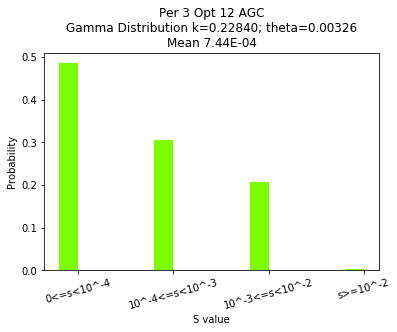

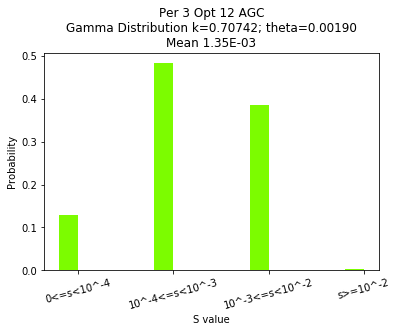

(0.0003049338669256319, 0.00020076092665997827, 0.0004091068071912855)
AGG number a,b pairs accepted: 2220


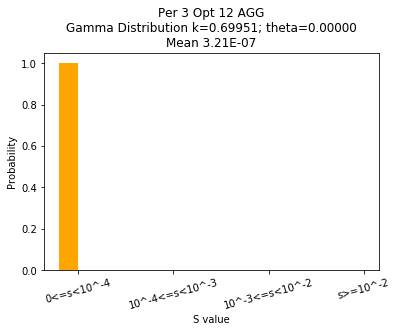

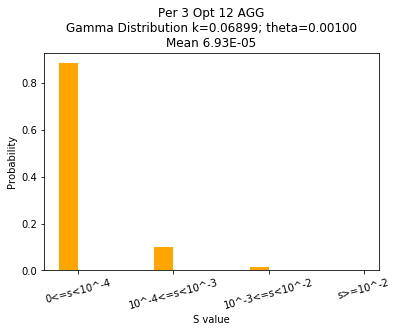

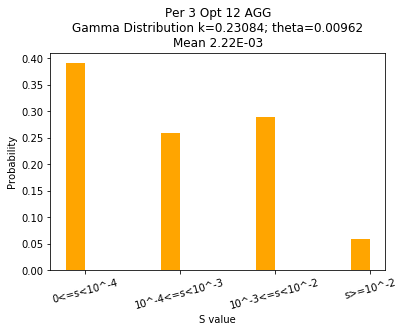

(8.263765450306579e-05, 7.891858900349194e-05, 8.635672000263963e-05)
ATC number a,b pairs accepted: 15


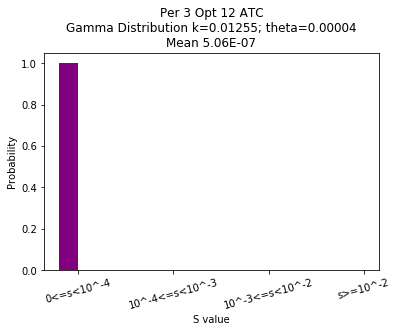

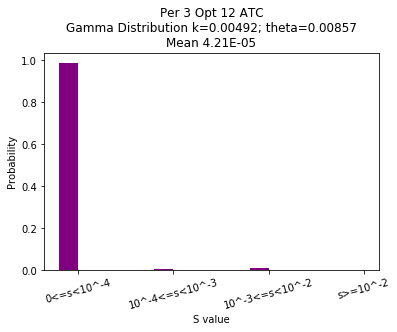

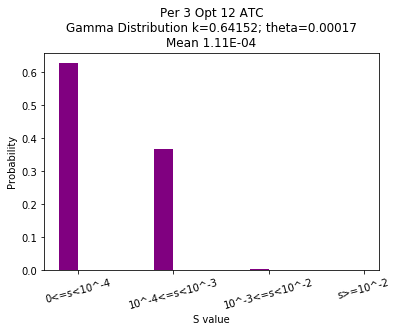

(2.792016296297898e-05, 2.028217089029922e-05, 3.5558155035658743e-05)
CCG number a,b pairs accepted: 2806


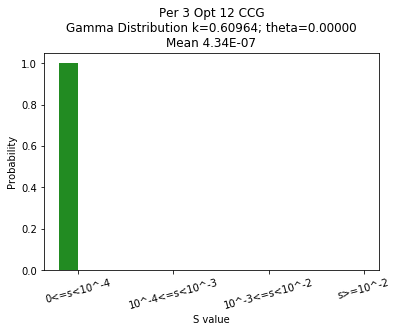

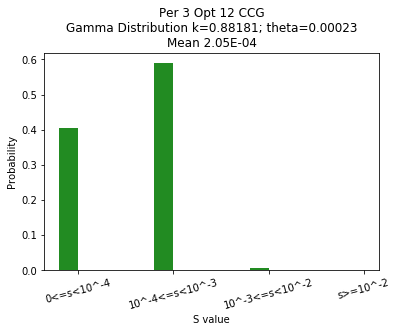

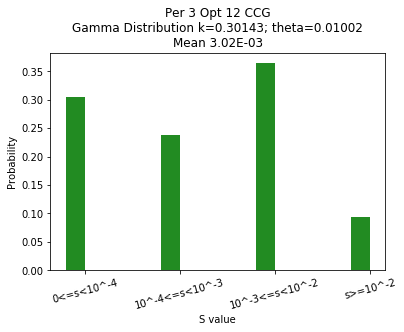

(0.0002140478233855572, 0.000207202534503513, 0.00022089311226760138)


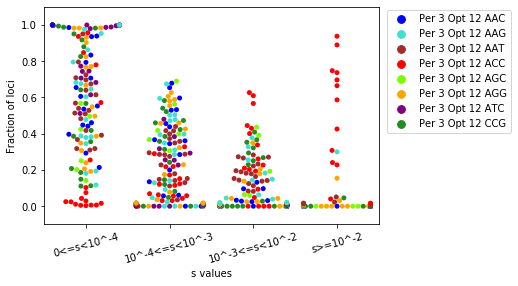

AAC number a,b pairs accepted: 1252


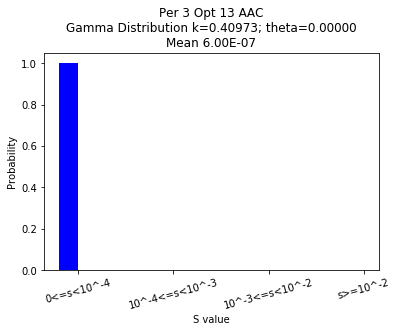

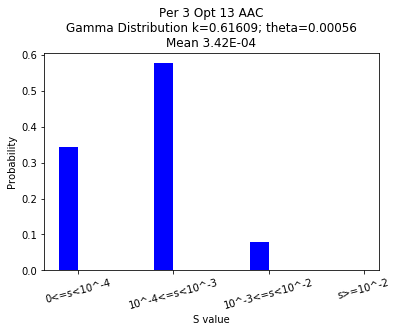

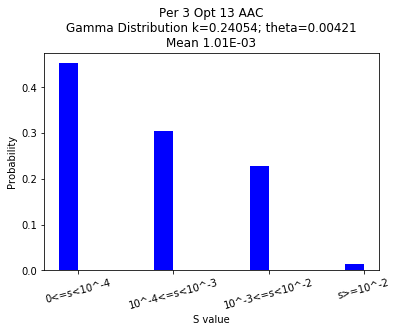

(0.00015989653103656238, 0.00015484159997517305, 0.00016495146209795171)
AAG number a,b pairs accepted: 16541


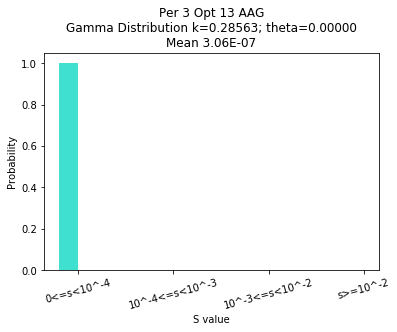

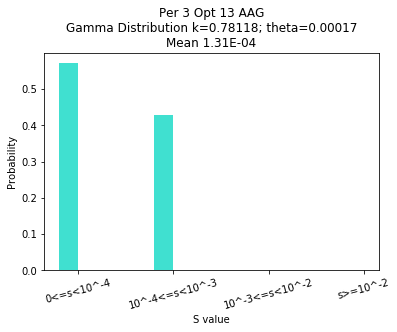

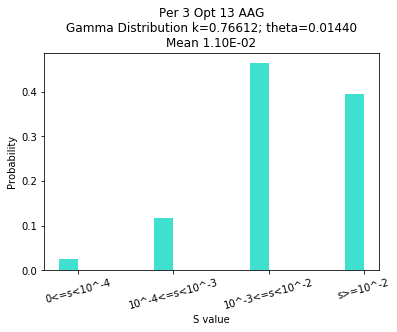

(0.0003877114334827634, 0.00033904442218559344, 0.0004363784447799334)
AAT number a,b pairs accepted: 8041


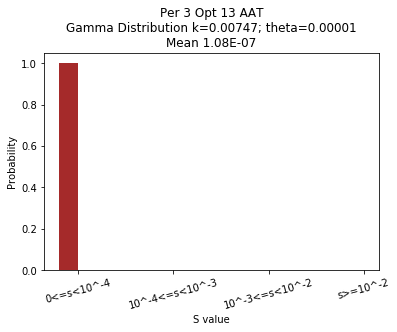

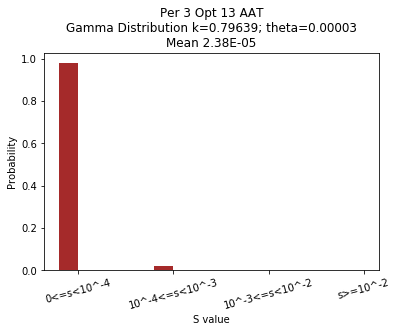

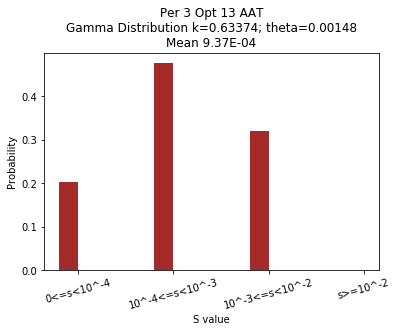

(7.305589229721238e-05, 7.134868988838646e-05, 7.47630947060383e-05)
ACC number a,b pairs accepted: 10696


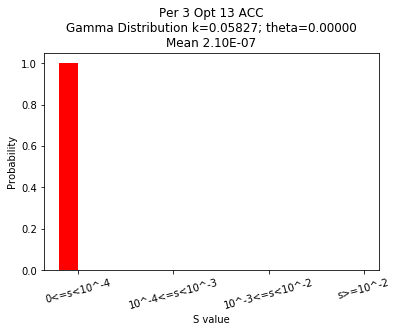

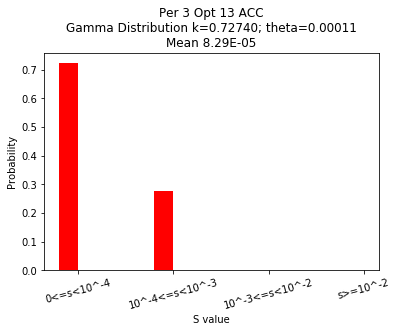

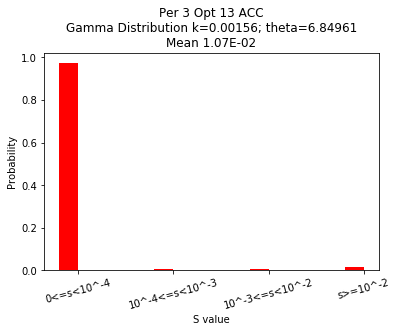

(0.00023537987491277078, 0.0002165477088251771, 0.0002542120410003645)
AGC number a,b pairs accepted: 136


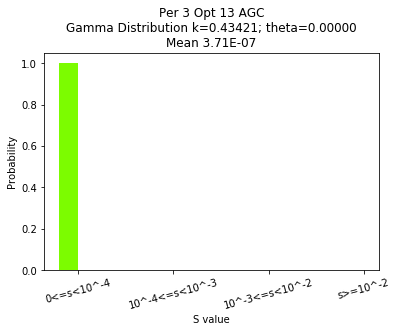

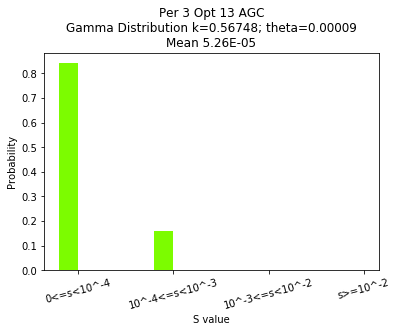

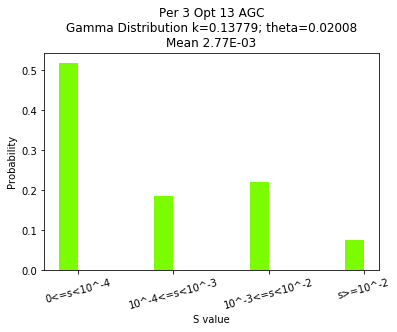

(0.00010044704606489843, 8.045140342894678e-05, 0.00012044268870085009)
AGG number a,b pairs accepted: 10166


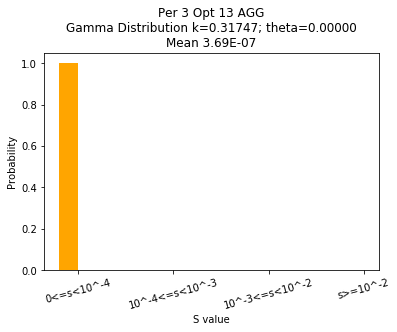

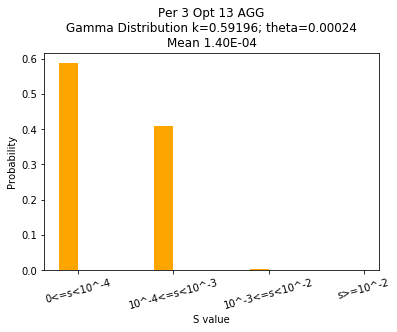

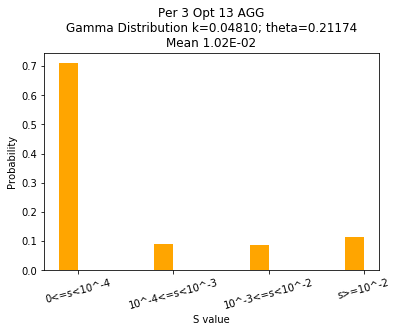

(0.00038459101831521826, 0.0003429239097293746, 0.0004262581269010619)
ATC number a,b pairs accepted: 223


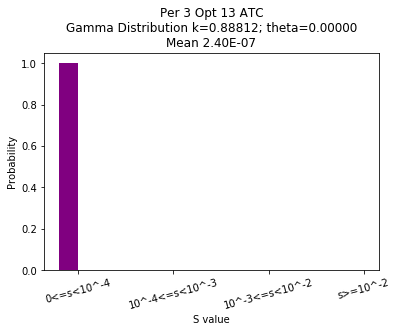

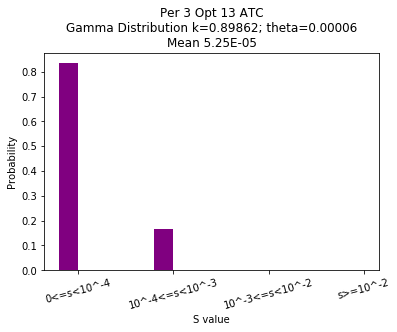

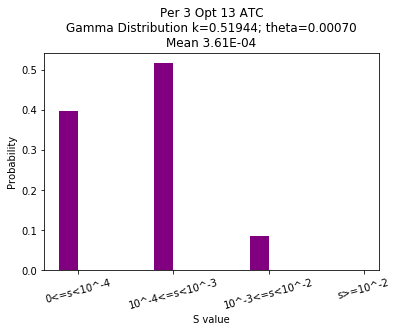

(4.109725253889978e-05, 3.732748801727273e-05, 4.4867017060526836e-05)
CCG number a,b pairs accepted: 27087


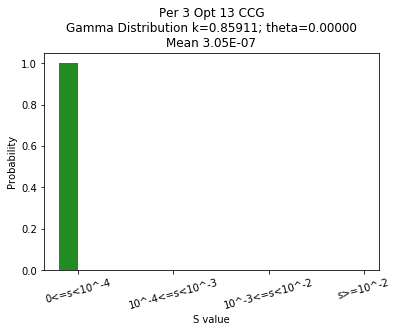

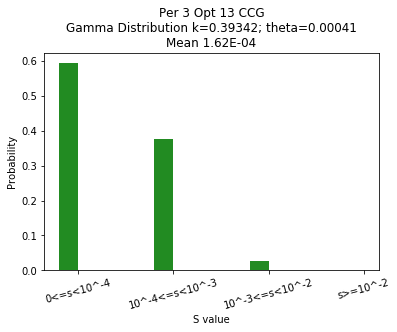

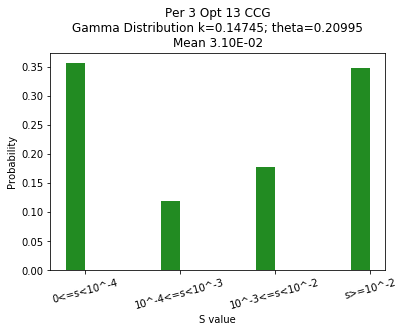

(0.0011649472638209821, 0.0010654762497325754, 0.0012644182779093889)


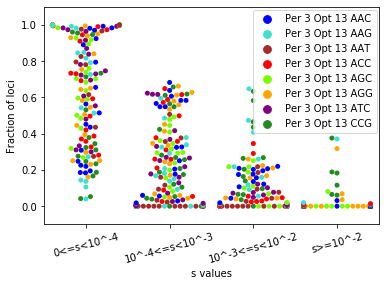

Running period: 4
AAAC number a,b pairs accepted: 1603


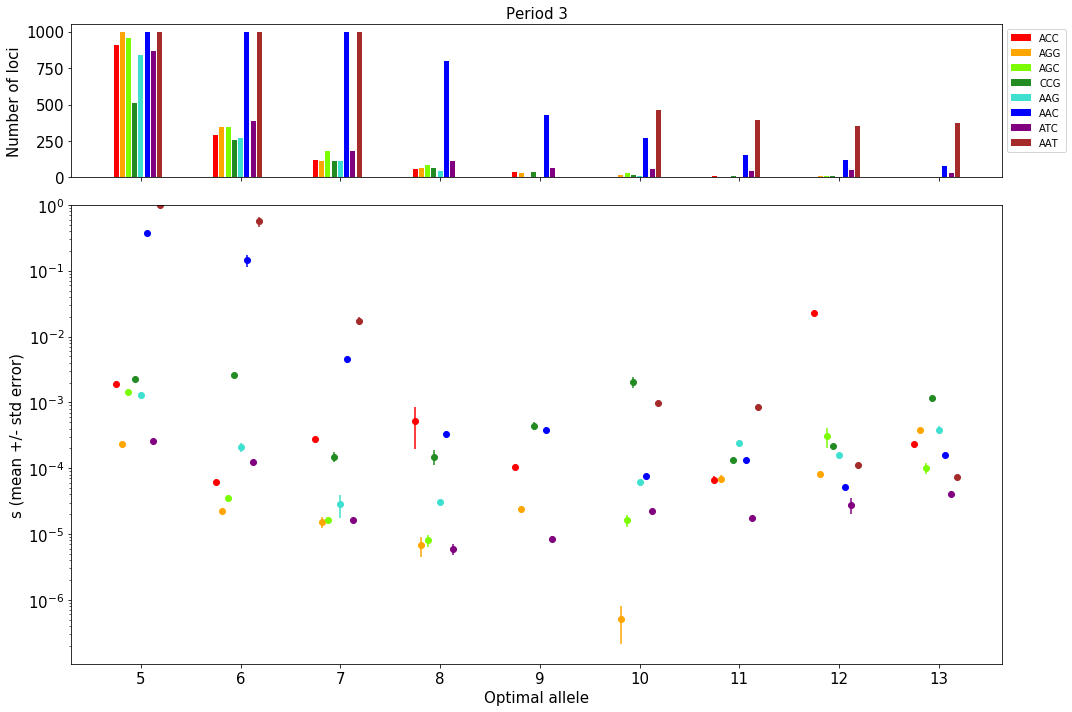

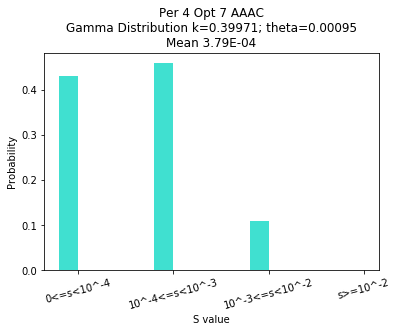

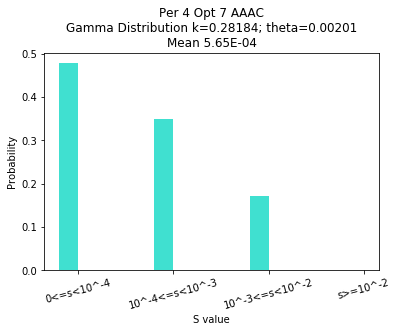

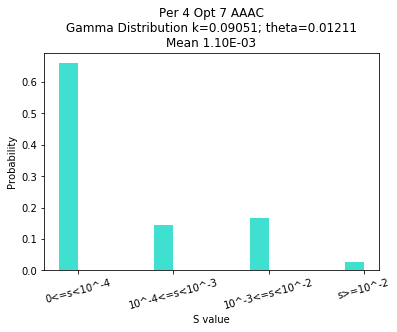

(0.00018373861638142753, 0.00018043935544262993, 0.00018703787732022513)
AAAG number a,b pairs accepted: 12


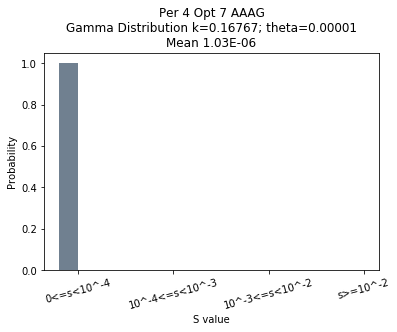

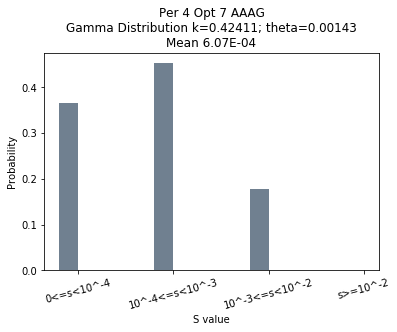

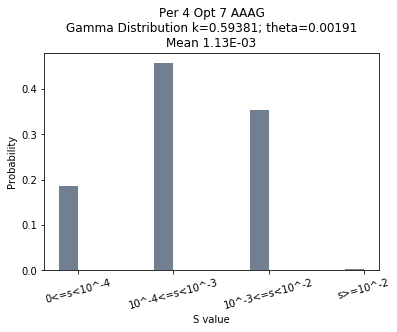

(0.00010190270960085818, 6.50201363535014e-05, 0.00013878528284821495)
AAAT number a,b pairs accepted: 165


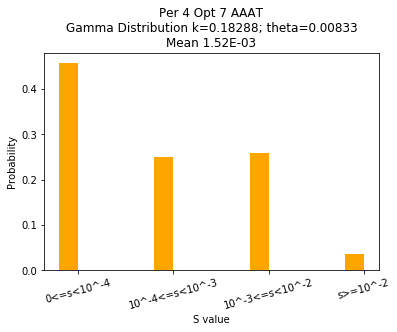

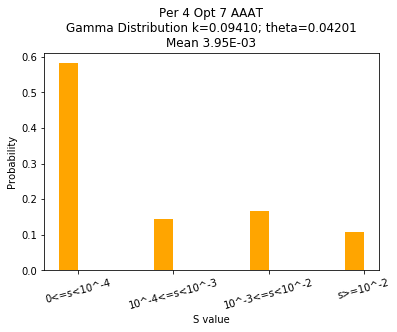

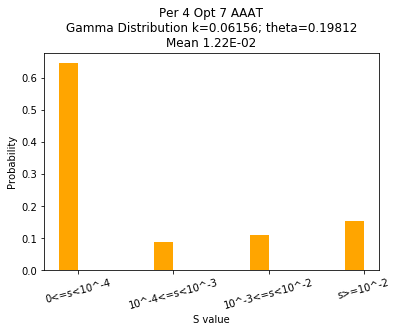

(5.561102478855264e-05, 4.956336674305626e-05, 6.165868283404901e-05)
AAGG number a,b pairs accepted: 690


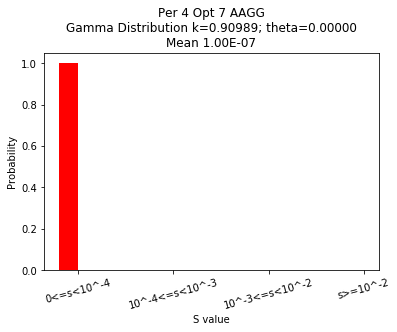

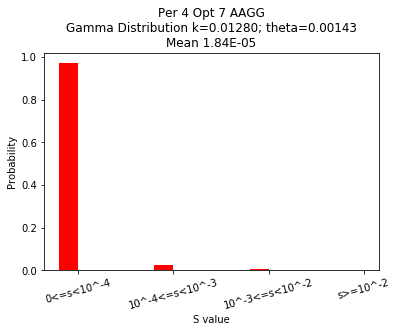

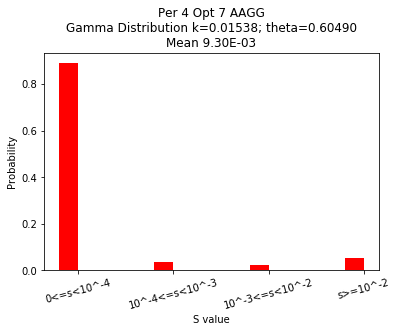

(2.4748626823195492e-05, 2.1617007763989843e-05, 2.788024588240114e-05)
AATC number a,b pairs accepted: 866


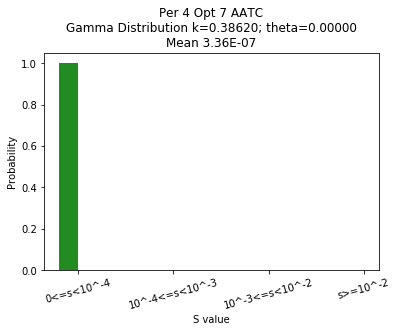

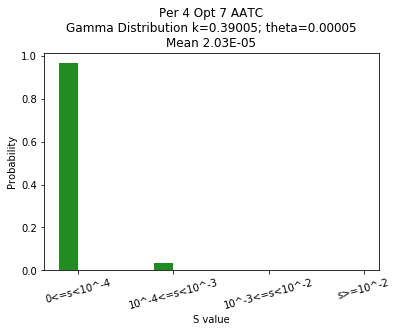

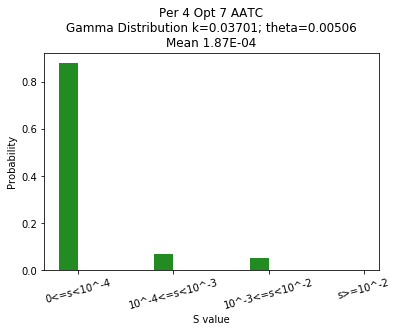

(1.3169199247785738e-05, 1.2492598632296967e-05, 1.3845799863274509e-05)
AATG number a,b pairs accepted: 629


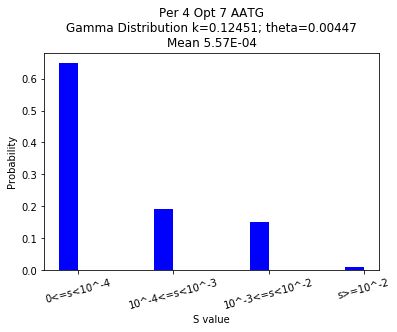

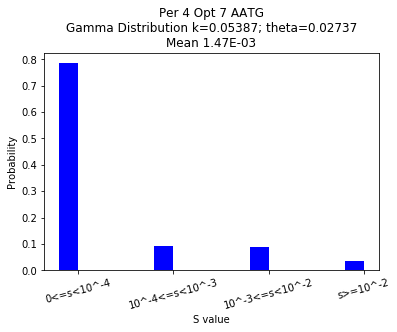

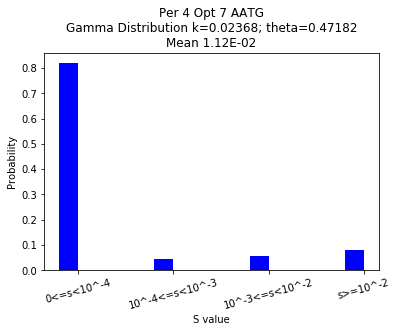

(7.66674646007013e-05, 7.234158871399558e-05, 8.099334048740702e-05)
ACAT number a,b pairs accepted: 260


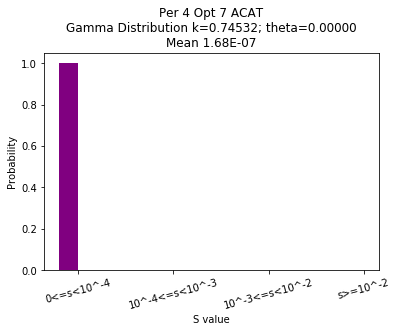

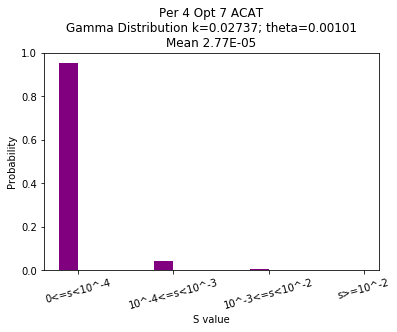

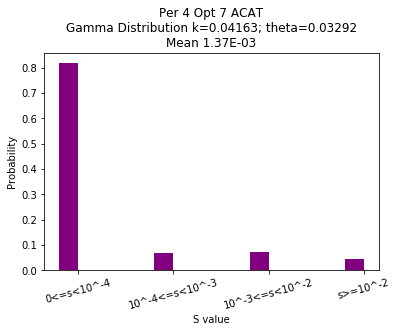

(2.153964305739617e-05, 1.8751302551880925e-05, 2.4327983562911414e-05)
ATCC number a,b pairs accepted: 170


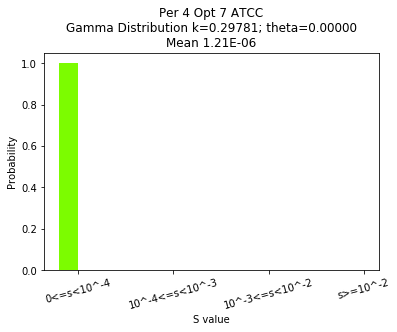

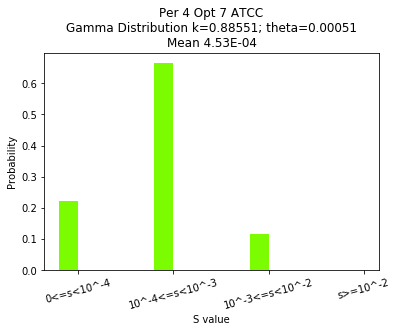

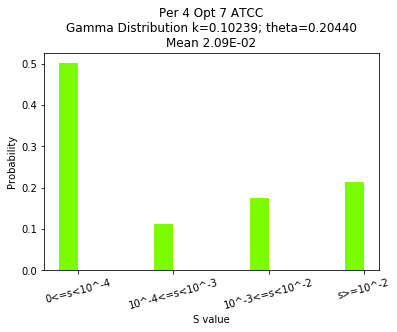

(0.00011014680805337444, 9.802630830604519e-05, 0.0001222673078007037)


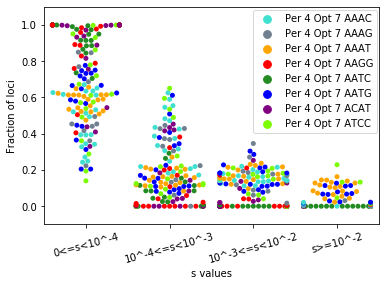

AAAC number a,b pairs accepted: 624


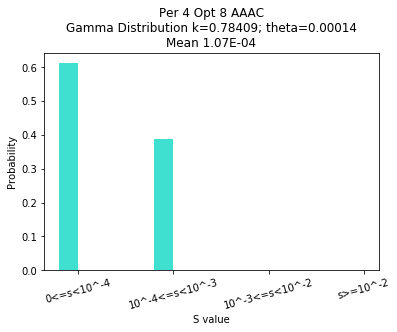

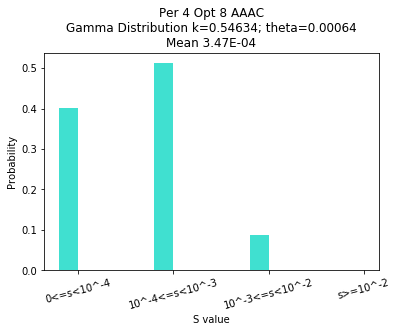

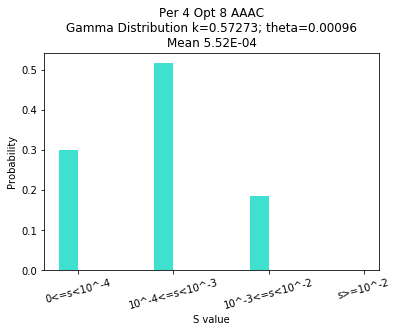

(0.00019559181540401872, 0.000192142203888338, 0.00019904142691969944)
AAAG number a,b pairs accepted: 5


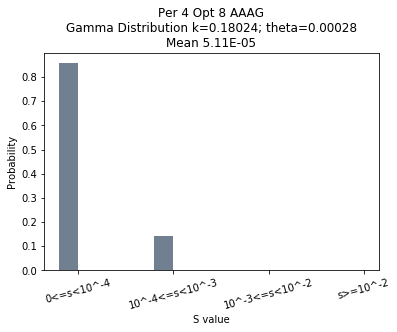

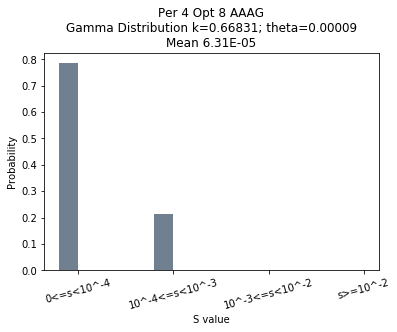

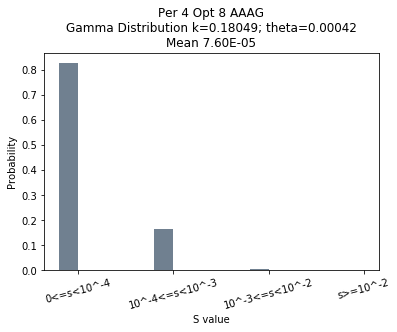

(2.464026180301747e-05, 1.6842769525468086e-05, 3.243775408056686e-05)
AAAT number a,b pairs accepted: 223


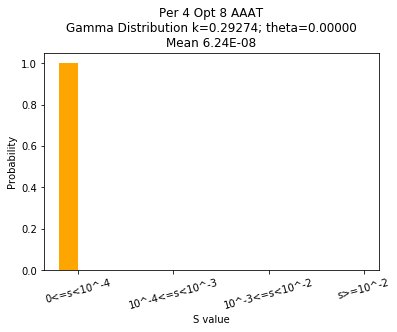

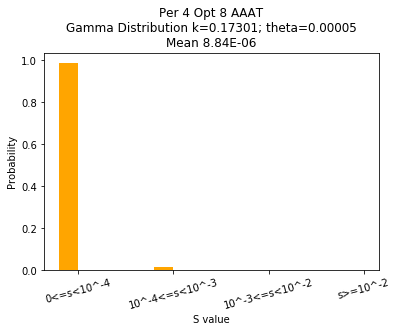

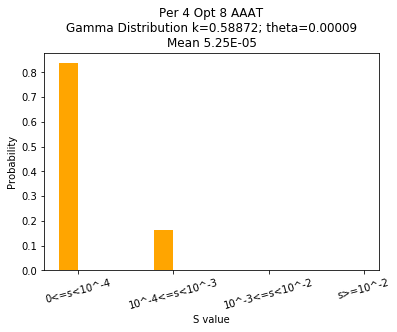

(5.930930820313492e-06, 5.456141463732299e-06, 6.405720176894684e-06)
AAGG number a,b pairs accepted: 9


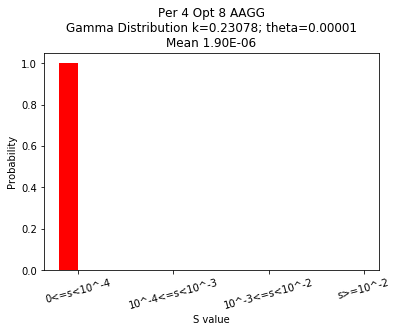

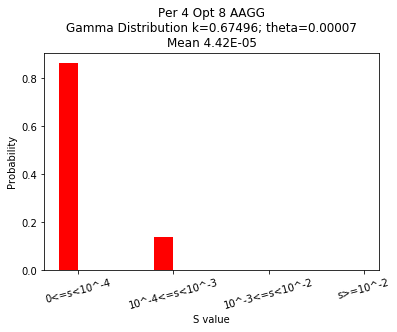

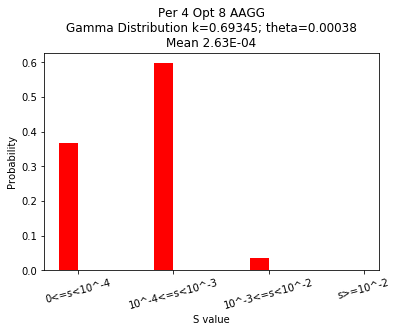

(4.5355422593895826e-05, 2.489950010951092e-05, 6.581134507828074e-05)
AATC number a,b pairs accepted: 372


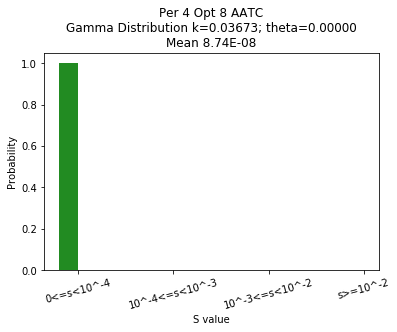

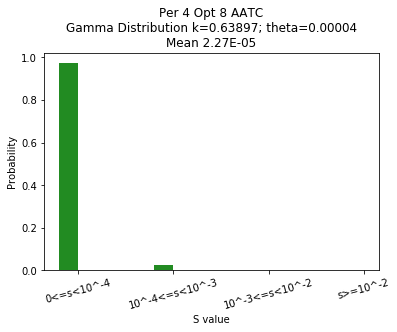

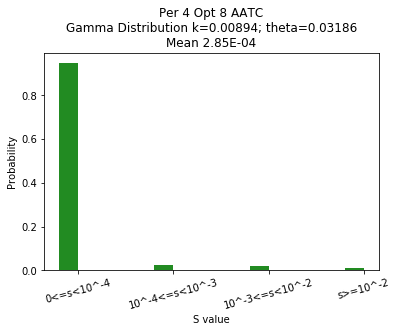

(1.881126160484359e-05, 1.7122081496394133e-05, 2.0500441713293045e-05)
AATG number a,b pairs accepted: 122


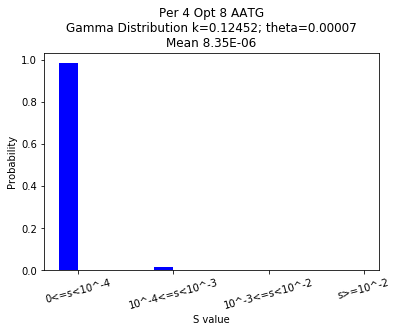

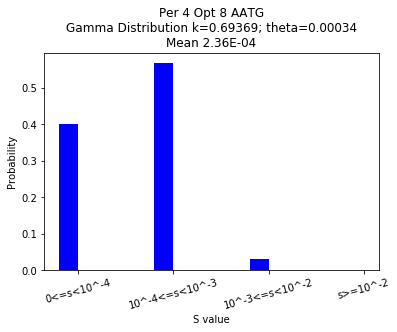

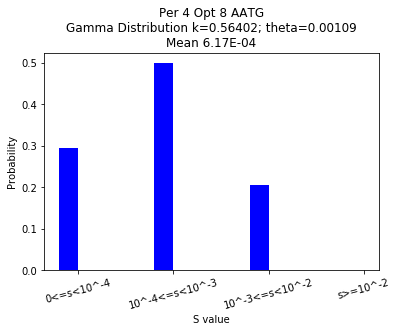

(0.0001131163225792991, 0.00010317737183521798, 0.0001230552733233802)
ACAT number a,b pairs accepted: 408


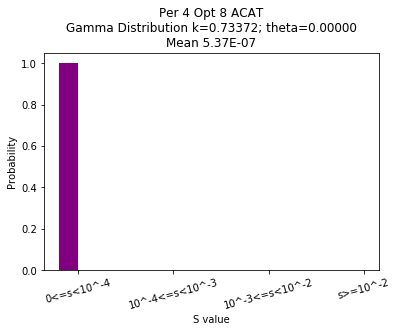

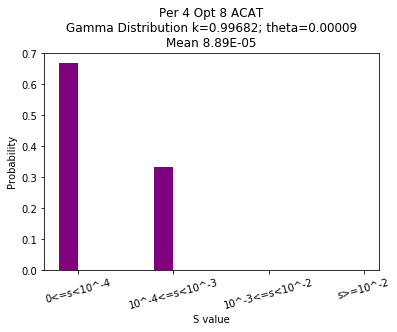

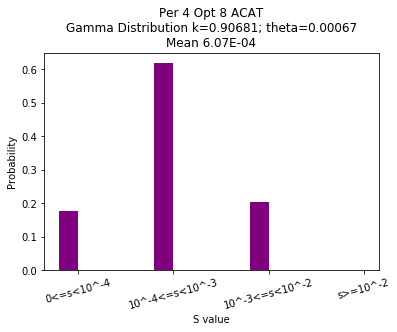

(6.507308043242546e-05, 6.028825577958987e-05, 6.985790508526104e-05)
ATCC number a,b pairs accepted: 46


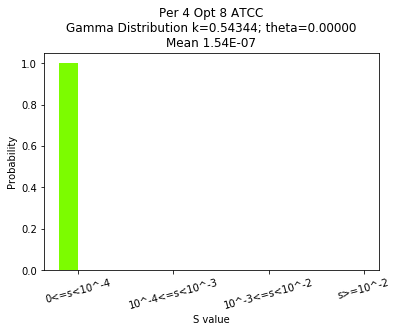

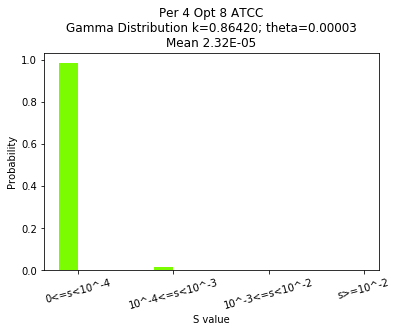

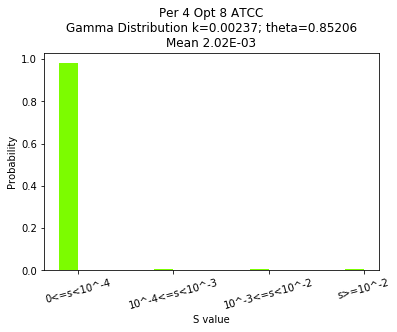

(2.275148344269148e-05, 1.3678552137315037e-05, 3.1824414748067926e-05)


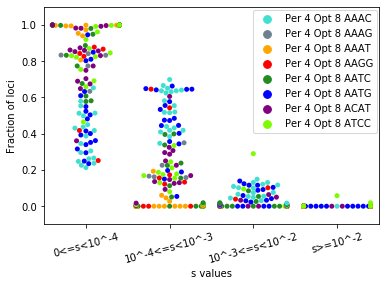

AAAC number a,b pairs accepted: 24


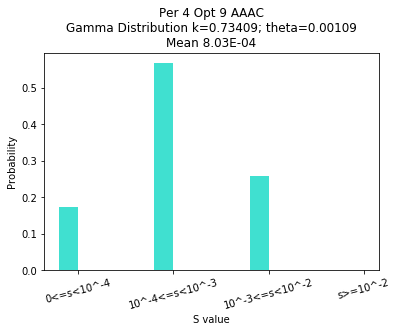

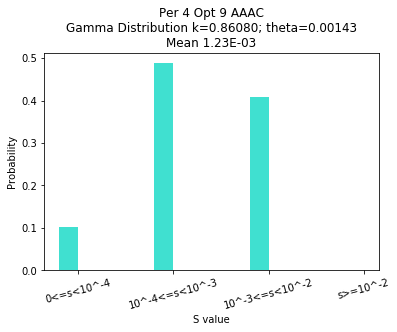

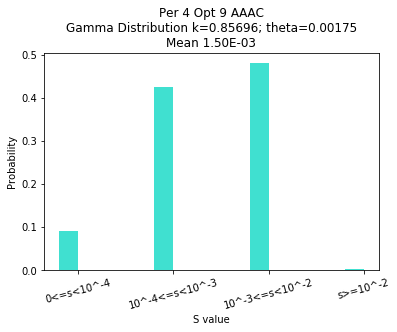

(0.0007736418196399834, 0.0007303928423907053, 0.0008168907968892615)
AAAG number a,b pairs accepted: 1248


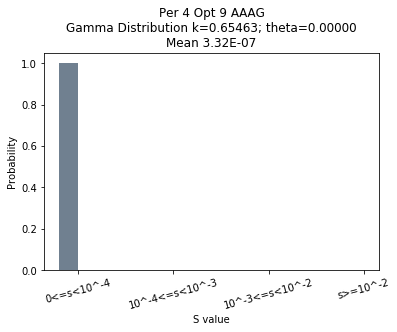

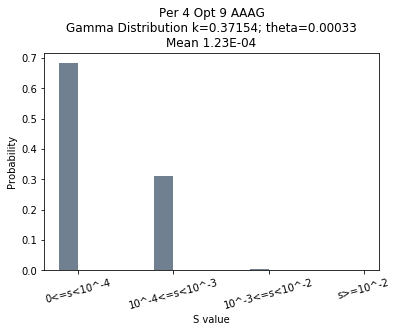

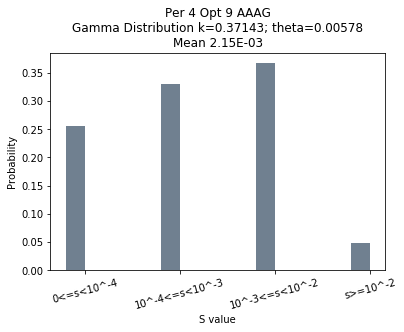

(0.00014121007126175698, 0.0001330254723959985, 0.00014939467012751545)
AAAT number a,b pairs accepted: 5871


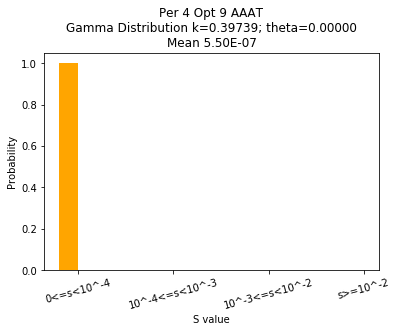

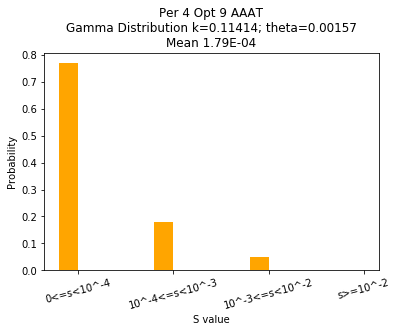

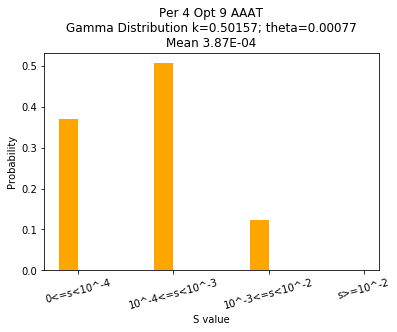

(6.545377558712294e-05, 6.460143587860587e-05, 6.630611529564e-05)
AAGG number a,b pairs accepted: 167


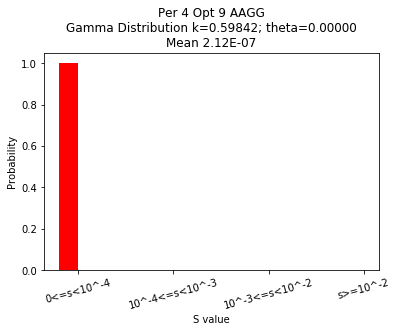

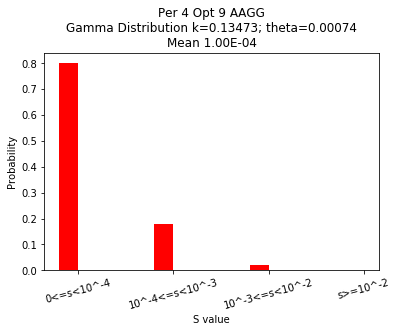

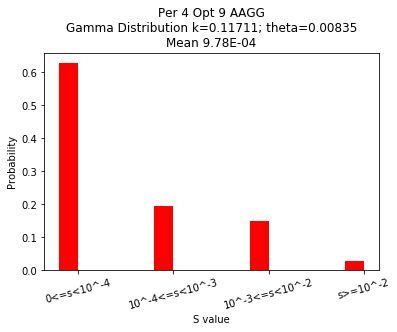

(7.199738846004365e-05, 6.220821751879872e-05, 8.178655940128859e-05)
AATC number a,b pairs accepted: 12


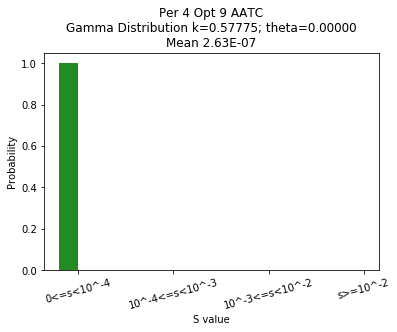

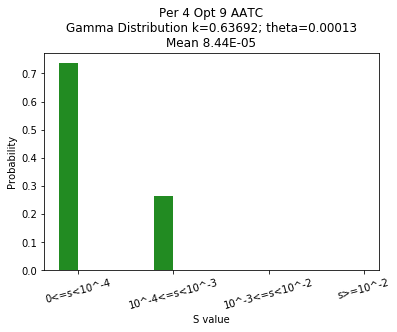

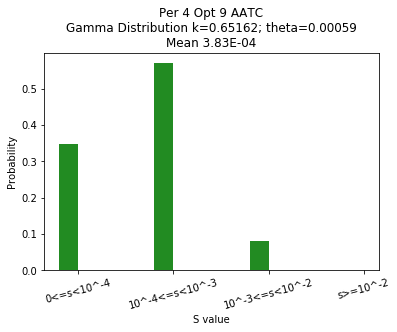

(5.750600224343957e-05, 3.665346217807568e-05, 7.835854230880347e-05)
AATG number a,b pairs accepted: 340


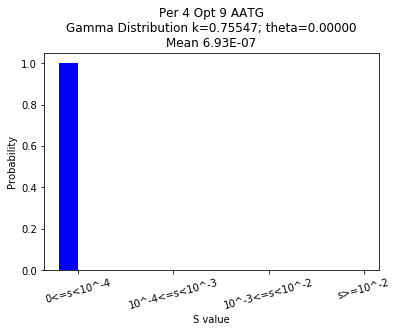

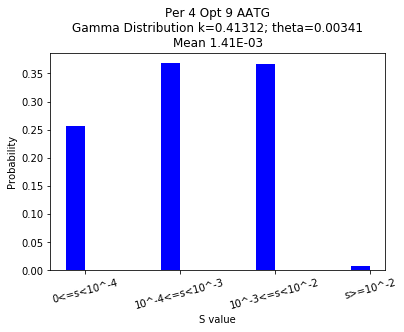

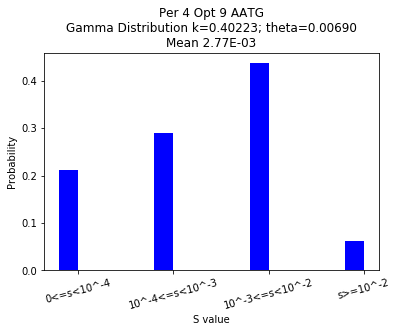

(0.0004686683000547466, 0.00044118035549958127, 0.000496156244609912)
ACAT number a,b pairs accepted: 72


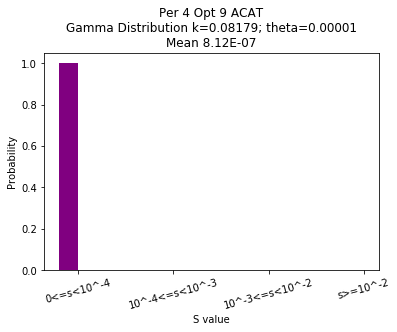

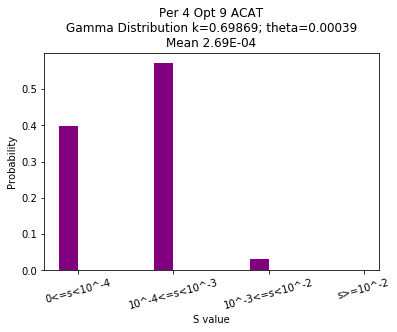

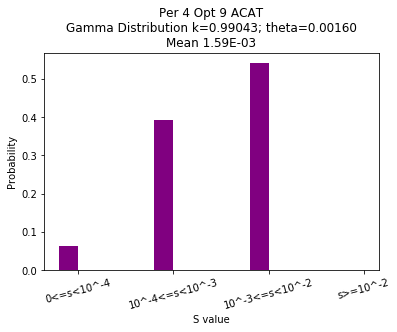

(0.0002512239756304446, 0.0002154554697890716, 0.0002869924814718176)
AGAT number a,b pairs accepted: 950


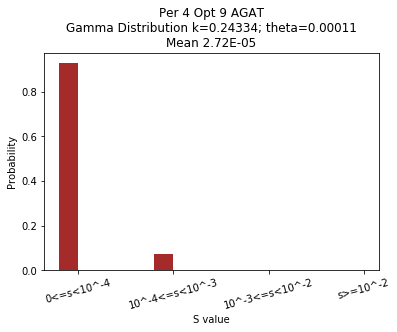

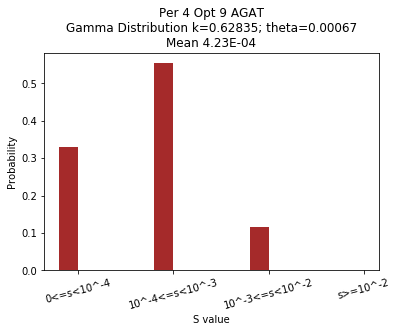

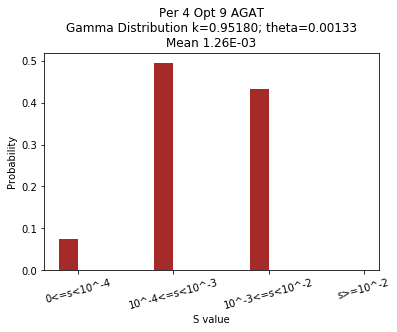

(0.00025355759311211266, 0.00024658616955423613, 0.0002605290166699892)
ATCC number a,b pairs accepted: 77


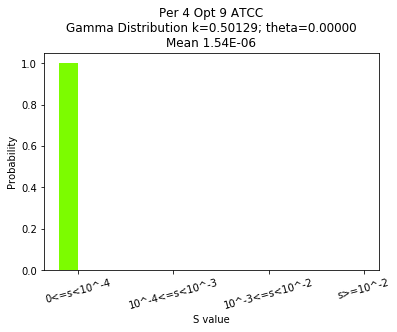

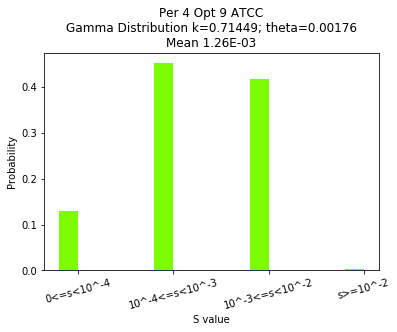

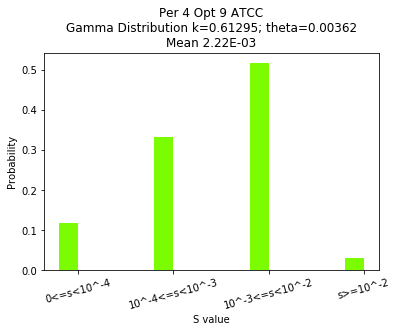

(0.0006920266552061967, 0.0006416605695692623, 0.0007423927408431311)


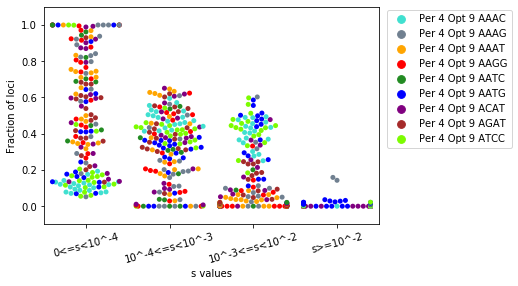

AAAC number a,b pairs accepted: 597


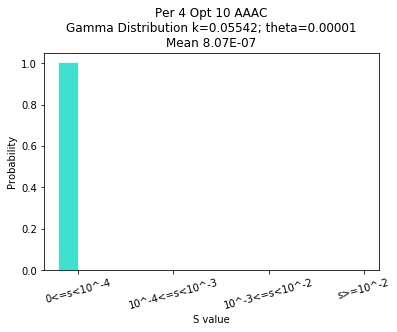

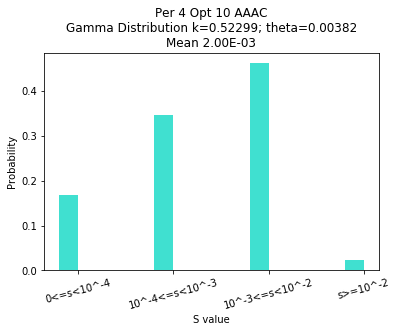

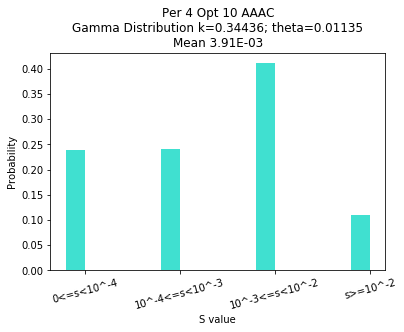

(0.00102145155264936, 0.0009915965235307055, 0.0010513065817680143)
AAAG number a,b pairs accepted: 19


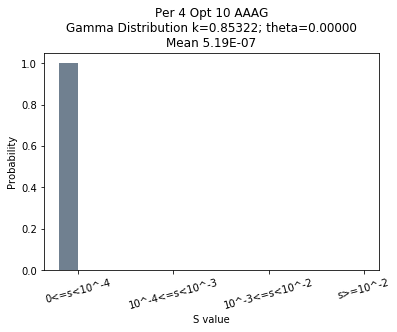

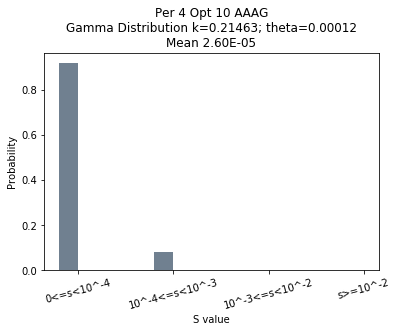

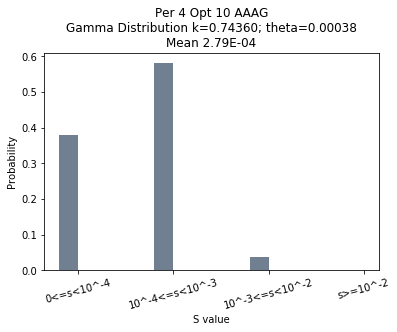

(3.904490160873502e-05, 2.2795229618078855e-05, 5.5294573599391186e-05)
AAAT number a,b pairs accepted: 380


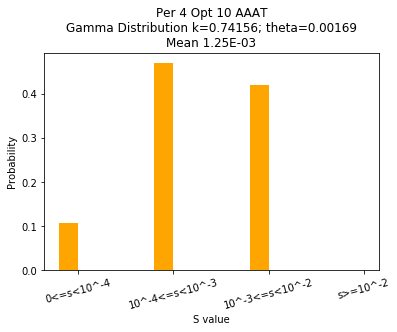

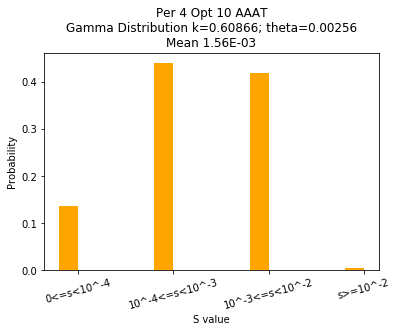

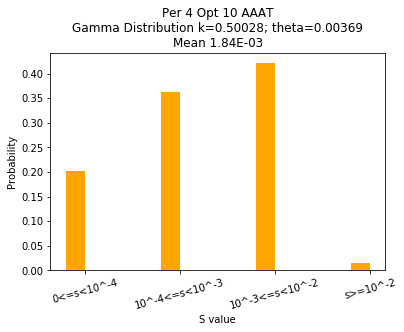

(0.0009743806474661037, 0.000964261407092367, 0.0009844998878398403)
AAGG number a,b pairs accepted: 33


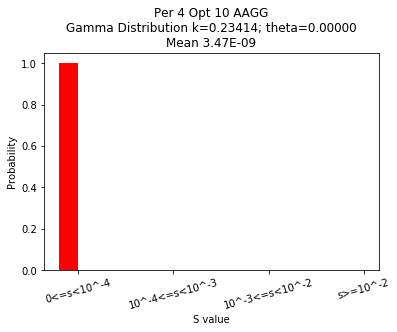

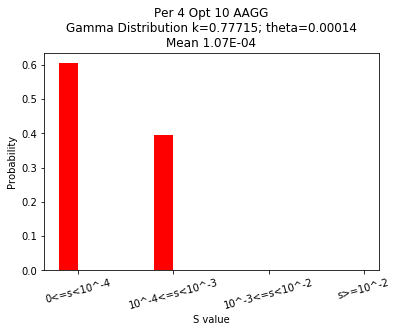

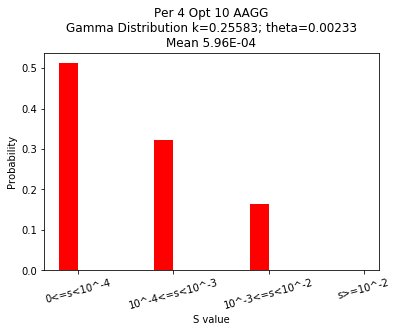

(6.230544949397571e-05, 4.819479538271055e-05, 7.641610360524088e-05)
AATC number a,b pairs accepted: 8329


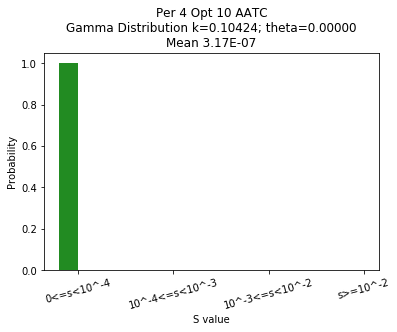

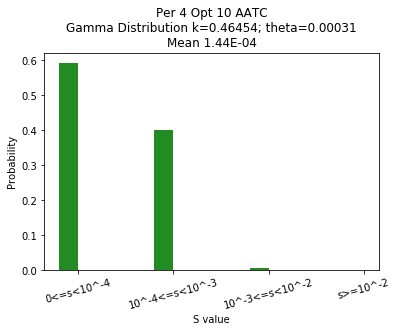

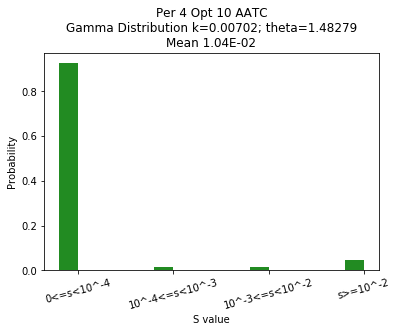

(0.00035094716262881374, 0.00032388088100182913, 0.00037801344425579834)
AATG number a,b pairs accepted: 245


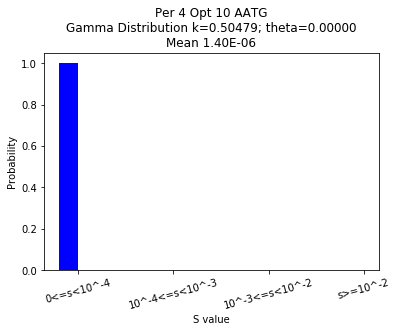

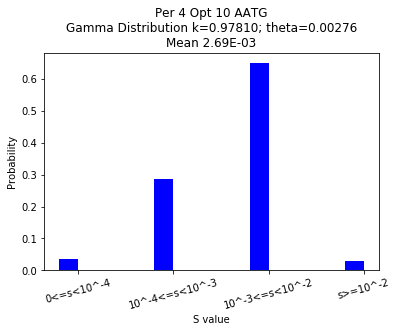

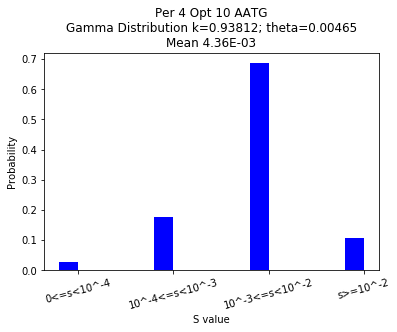

(0.0014037388342274092, 0.0013517696298905135, 0.001455708038564305)
ACAT number a,b pairs accepted: 15


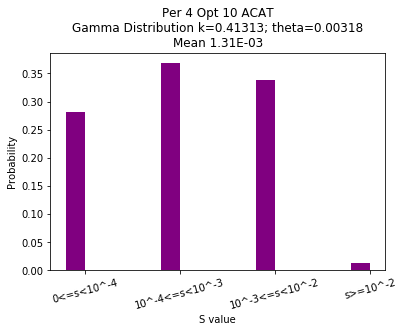

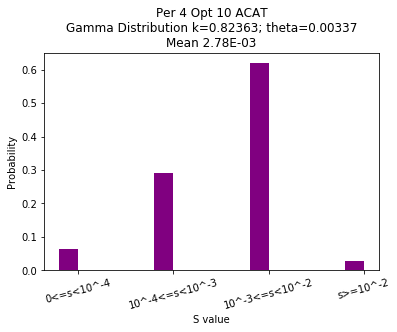

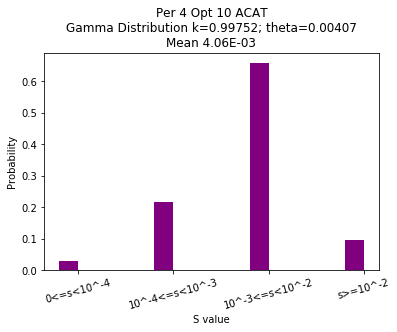

(0.0016138951737826887, 0.0014159957377489147, 0.0018117946098164628)
AGAT number a,b pairs accepted: 1601


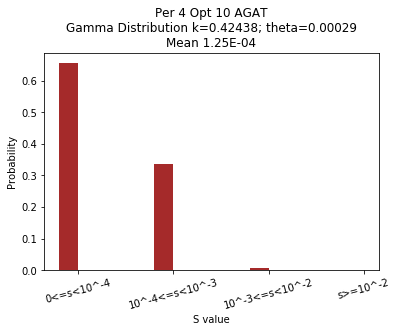

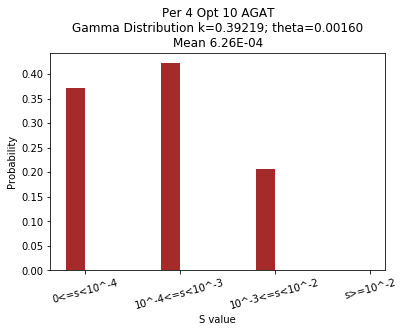

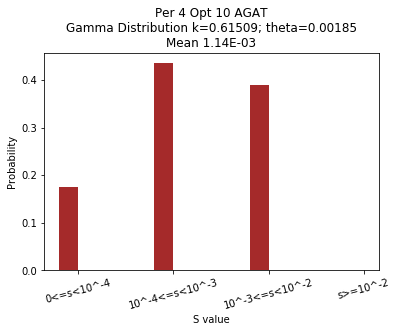

(0.00034005357015608016, 0.00033497047587013483, 0.0003451366644420255)
ATCC number a,b pairs accepted: 44


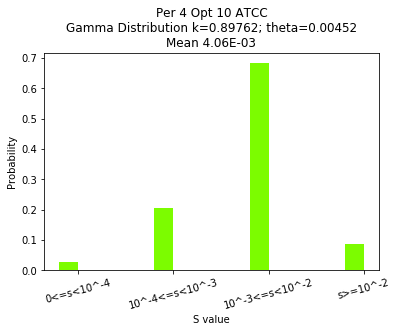

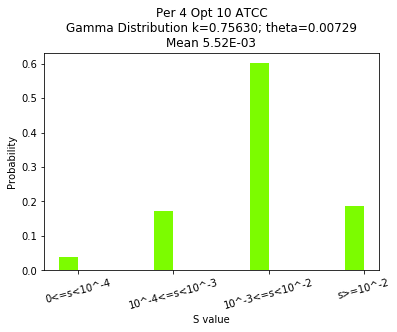

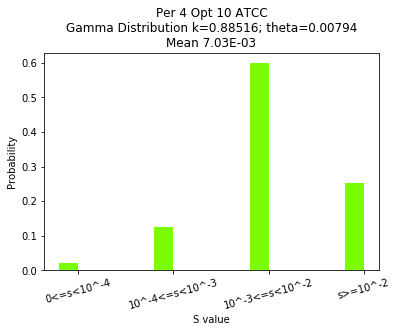

(0.0035714420591822175, 0.003413436147238815, 0.00372944797112562)


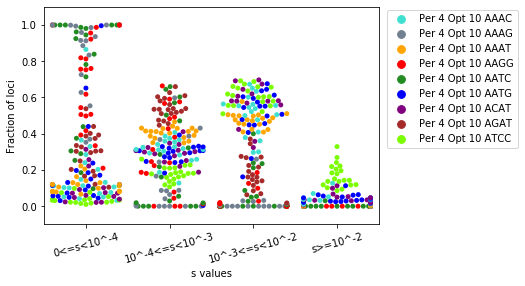

CPU times: user 9min 1s, sys: 4.96 s, total: 9min 6s
Wall time: 9min


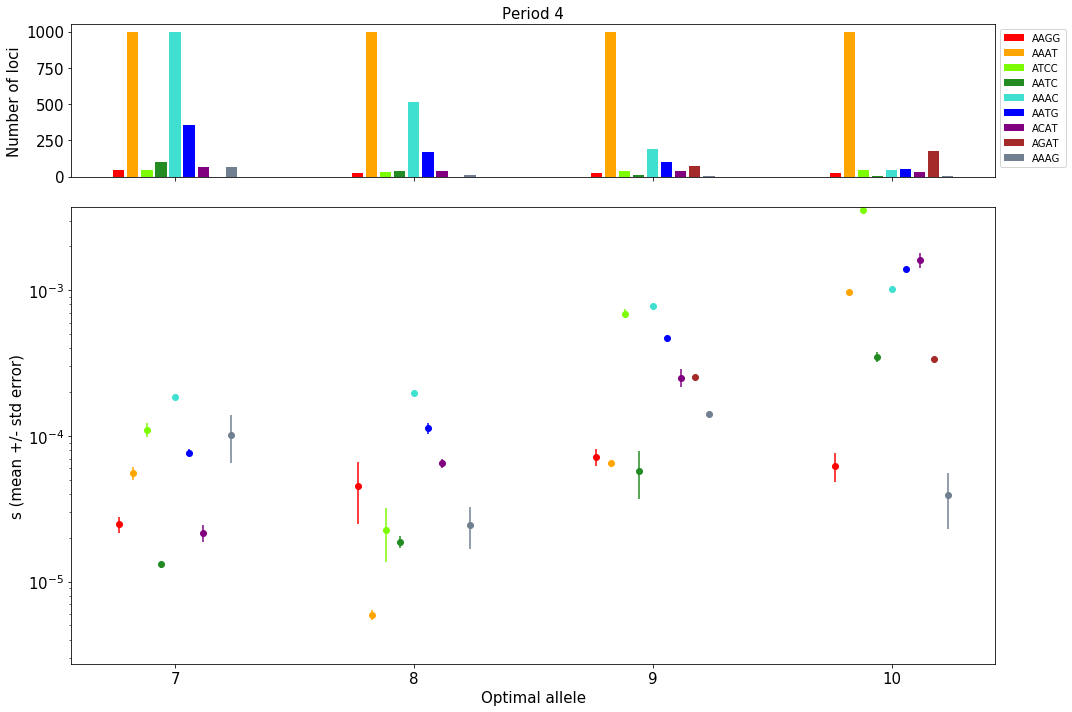

In [8]:
%%time
if __name__ == '__main__':
    main()